<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Binary Prediction of Poisonous Mushrooms</h1>

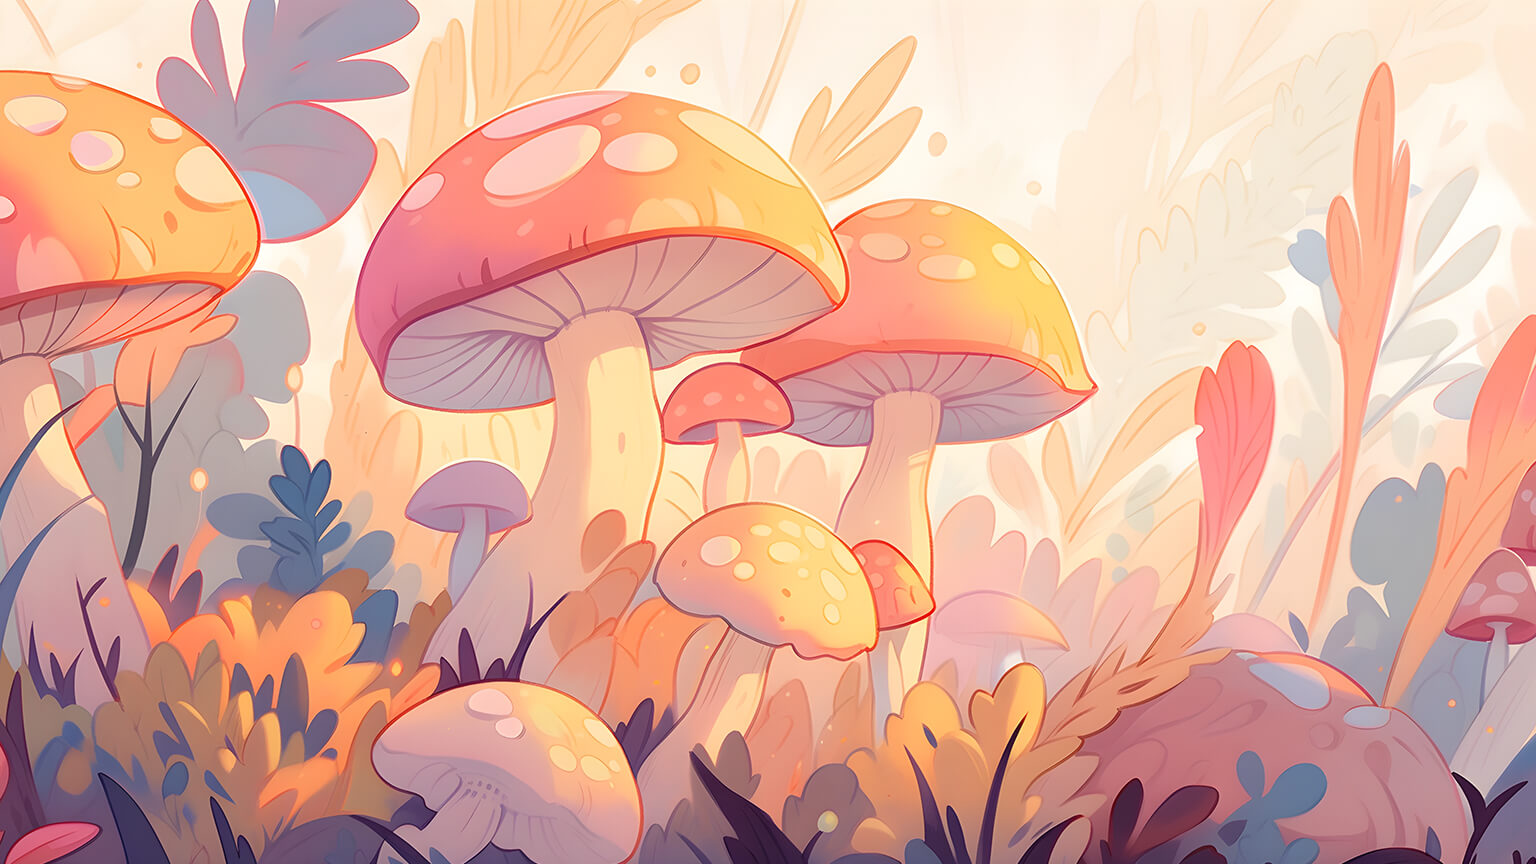

In [67]:
! pip install -U klib

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Imports and reading data</h1>

In [1]:
import numpy as np 
import pandas as pd 

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
t = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")

In [72]:
import klib
new_t = klib.convert_datatypes(t)
del t

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">🛠️ Using convert_datatype function in klib Library</h1>




The `convert_datatype` function from the `klib` library is a powerful tool designed to optimize your data by changing its data type to reduce memory usage. This is especially useful when working with large datasets.

<font size="5">🔍 Function Overview</font>

The function efficiently converts the data types of your DataFrame columns to save memory without losing precision. Here's a quick look at what it does:

- **Reduces Memory Usage:** By converting columns to more memory-efficient data types.
- **Maintains Precision:** Ensures that the precision of your data remains intact after conversion.

<font size="5"><b>📚 Usage</b></font>

To use the `convert_datatype` function, follow these steps:

1. **Import the Library**

   ```python
   import klib```


<font size="5">🌟 Example</font>

Here’s a visual example showing the before and after of using `convert_datatype`:

<font size="3"><b>Before Conversion</b></font>

| **Column** | **Data Type** |
|--------|-----------|
| A      | int64     |
| B      | int64     |

<font size="3"><b>After Conversion</b></font>

| **Column** | **Data Type** |
|--------|-----------|
| A      | int8      |
| B      | int16     |

The conversion reduces the data type sizes and optimizes memory usage.

<font size="5">🚀 Benefits</font>

- **Memory Efficiency:** Significantly reduces the memory footprint of your DataFrame.
- **Faster Processing:** Smaller data sizes lead to faster computations.
- **Better Performance:** Improves overall performance of data processing tasks.


<font size="5">🛠️ Additional Resources</font> 

- [Klib Documentation](https://github.com/klib/klib)

In [73]:
new_t.head(10)

id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   
5   5     p          4.30         x           t         n   
6   6     e          9.65         p           y         w   
7   7     p          4.55         x           e         e   
8   8     p          7.36         f           h         e   
9   9     e          6.45         x           t         n   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   
5                    f               s            c          n  ...   
6                    f               e            c          k  ...   
7                    f               a          NaN          y  ...   
8                    f               x            d          w  ...   
9                    f               a            d          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN             y          o       NaN        NaN        t         z   
2        NaN             s          n       NaN        NaN        f         f   
3        NaN           NaN          w       NaN        NaN        f         f   
4        NaN           NaN          w       NaN        NaN        f         f   
5        NaN           NaN          w       NaN          n        t         z   
6        NaN             s          w       NaN        NaN        t         e   
7        NaN           NaN          y       NaN          w        t         z   
8          b           NaN          w       NaN        NaN        f         f   
9        NaN           NaN          e       NaN        NaN        f         f   

  spore-print-color habitat season  
0               NaN       d      a  
1               NaN       d      w  
2               NaN       l      w  
3               NaN       d      u  
4               NaN       g      a  
5               NaN       d      a  
6               NaN       g      w  
7               NaN       d      a  
8               NaN       d      a  
9               NaN       d      a  

[10 rows x 22 columns]

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Exploring and analysing the dataset</h1>


In [74]:
print(f"Data-types of different columns in our dataset : \n\n{new_t.dtypes}")

Data-types of different columns in our dataset : 

id                         int32
class                   category
cap-diameter             float32
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float32
stem-width               float32
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object


In [75]:
print(f"Number of Null values in our dataframe : \n\n{new_t.isnull().sum()}")

Number of Null values in our dataframe : 

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


We could have got all the above information with only one line of code :<br>
<code>dataframe.info(show_counts=True)</code>

In [76]:
new_t.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    3116945 non-null  int32   
 1   class                 3116945 non-null  category
 2   cap-diameter          3116941 non-null  float32 
 3   cap-shape             3116905 non-null  category
 4   cap-surface           2445922 non-null  category
 5   cap-color             3116933 non-null  category
 6   does-bruise-or-bleed  3116937 non-null  category
 7   gill-attachment       2593009 non-null  category
 8   gill-spacing          1858510 non-null  category
 9   gill-color            3116888 non-null  category
 10  stem-height           3116945 non-null  float32 
 11  stem-width            3116945 non-null  float32 
 12  stem-root             359922 non-null   category
 13  stem-surface          1136084 non-null  category
 14  stem-color        

In [77]:
cat_cols = [x for x in new_t.columns if new_t[x].dtype == 'category'][1:]
cat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [78]:
for i in cat_cols:
    print(f"Unique values in {i} : \n{new_t[i].unique()}\n")

Unique values in cap-shape : 
['f', 'x', 'p', 'b', 'o', ..., '17.44', '4.33', '2.82', '6.53', '19.06']
Length: 75
Categories (74, object): ['0.82', '1.66', '10.13', '10.46', ..., 'w', 'x', 'y', 'z']

Unique values in cap-surface : 
['s', 'h', 'y', 'l', 't', ..., '10.34', '10.1', '1.08', 'is k', '0.87']
Length: 84
Categories (83, object): ['0.85', '0.87', '0.88', '1.08', ..., 'w', 'x', 'y', 'z']

Unique values in cap-color : 
['u', 'o', 'b', 'g', 'w', ..., '20.02', '20', '25.98', '8.67', '9.02']
Length: 79
Categories (78, object): ['1.51', '10.1', '10.56', '11.13', ..., 'w', 'x', 'y', 'z']

Unique values in does-bruise-or-bleed : 
['f', 't', 'd', 'has-ring', 'w', ..., '3.43', 'e', '4.42', '2.9', 'u']
Length: 27
Categories (26, object): ['2.9', '3.43', '4.42', 'a', ..., 'w', 'x', 'y', 'z']

Unique values in gill-attachment : 
['a', 'x', 's', 'd', 'e', ..., '16.27', '11.26', '2.79', 'is f', '13.94']
Length: 79
Categories (78, object): ['0.92', '1', '1.32', '1.37', ..., 'w', 'x', 'y', 'z']

In [79]:
pd.set_option('display.max_rows', None)

In [80]:
for i in cat_cols:
    counts = new_t[i].value_counts()
    print(f"Counts for {i}: {counts}\n")  

Counts for cap-shape: cap-shape
x            1436026
f             676238
s             365146
b             318646
o             108835
p             106967
c             104520
d                 65
e                 60
n                 41
w                 36
t                 36
g                 34
y                 33
r                 32
a                 30
u                 27
z                 22
l                 21
i                 14
k                 13
h                  6
8                  2
7 x                2
3.55               2
m                  2
4.97               2
7.6                1
7.43               1
7.41               1
8.29               1
8.3                1
9.13               1
b f                1
ring-type          1
0.82               1
is p               1
is s               1
7.21               1
21.56              1
20.25              1
2.94               1
2.85               1
2.82               1
2.77               1
2.63               1
6.

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">As we can observe that certain categories, such as <code>"3.55"</code> and <code>"7 x"</code> are not meaningful within the current context and have <code>count &#60 10</code>. To streamline the analysis and improve clarity, these categories are combined into a single <code>"Others"</code> category.</div>

In [81]:
# Group rare categories into 'Other'
threshold = 10  
new_cat_cols = []
for i in cat_cols:
    counts = new_t[i].value_counts()
    rare_categories = counts[counts < threshold].index
    new_t[f"new_{i}"] = new_t[i].apply(lambda x: x if x in counts.index[counts >= threshold] else 'Other')
    new_cat_cols.append(f"new_{i}")
    new_t.drop(i,axis=1,inplace=True)

In [82]:
new_cat_cols

['new_cap-shape',
 'new_cap-surface',
 'new_cap-color',
 'new_does-bruise-or-bleed',
 'new_gill-attachment',
 'new_gill-spacing',
 'new_gill-color',
 'new_stem-root',
 'new_stem-surface',
 'new_stem-color',
 'new_veil-type',
 'new_veil-color',
 'new_has-ring',
 'new_ring-type',
 'new_spore-print-color',
 'new_habitat',
 'new_season']

In [83]:
cont_cols = [x for x in new_t.columns if x not in new_cat_cols][2:]
cont_cols

['cap-diameter', 'stem-height', 'stem-width']

In [84]:
for i in new_cat_cols:
    counts = new_t[i].value_counts()
    print(f"Counts for {i}: {counts}\n")  

Counts for new_cap-shape: new_cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
p         106967
c         104520
d             65
Other         63
e             60
n             41
w             36
t             36
g             34
y             33
r             32
a             30
u             27
z             22
l             21
i             14
k             13
Name: count, dtype: int64

Counts for new_cap-surface: new_cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
d        206832
k        128875
e        119712
i        113440
w        109840
l         44859
n            96
Other        81
f            75
p            59
u            49
a            44
m            42
o            39
r            35
x            33
c            31
b            18
Name: count, dtype: int64

Counts for new_cap-color: new_cap-color
n        1359542
y         386627
w         379442
g         210825
e         19

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Chi-Square Testing 🔍</h1>

Chi-Square Testing is a statistical method used to determine if there is a significant association between categorical variables. It helps us understand if the observed frequency distribution of a categorical variable differs from what we would expect.

<font size="5">Types of Chi-Square Tests 🎲</font>

1. **Chi-Square Test of Independence** 
   - **Purpose:** Determine if there is a significant relationship between two categorical variables.
   - **Example:** Investigating if there is a relationship between gender and voting preference.
   

2. **Chi-Square Test of Goodness of Fit** 
   - **Purpose:** Determine if sample data matches an expected distribution.
   - **Example:** Testing if a die is fair by comparing observed dice rolls to expected frequencies.

<font size="5">How to Perform Chi-Square Testing 🛠️</font>

1. **Formulate Hypotheses** 🧐
   - **Null Hypothesis (H0):** Assumes no association or no difference.
   - **Alternative Hypothesis (H1):** Assumes an association or a difference.
   

2. **Calculate the Chi-Square Statistic** ✏️
   - Use the formula:
     $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$
     Where $( O_i )$ is the observed frequency, and $( E_i )$ is the expected frequency.
     

3. **Determine the Degrees of Freedom (df)** 📈
   - For the test of independence: $( (r - 1) \times (c - 1) )$, where $( r )$ is the number of rows, and $( c )$ is the number of columns in the contingency table.
   - For the goodness of fit test: $( k - 1 )$, where $( k )$ is the number of categories.
   

4. **Compare with Critical Value** 🔍
   - Use the Chi-Square distribution table to find the critical value at a chosen significance level (e.g., 0.05). 
   - If the calculated Chi-Square statistic is greater than the critical value, reject the null hypothesis.


**Let's work it out ...**

In [85]:
from scipy.stats import chi2_contingency

In [86]:
for i in new_t.columns[2:]:
    if i not in cont_cols:
        contingency_table = pd.crosstab(new_t[i], new_t['class'])
        statistic, p_value, dof, expected_freq = chi2_contingency(contingency_table)
        print(f"For {i} :")
        print(f'      Chi-Square statistic: {statistic}')
        print(f'      Chi-Square p-value for {i}: {p_value}')
        print(f'      Chi-Square dof for {i}: {dof}\n')


For new_cap-shape :
      Chi-Square statistic: 87484.0259574092
      Chi-Square p-value for new_cap-shape: 0.0
      Chi-Square dof for new_cap-shape: 21

For new_cap-surface :
      Chi-Square statistic: 196197.42151826862
      Chi-Square p-value for new_cap-surface: 0.0
      Chi-Square dof for new_cap-surface: 22

For new_cap-color :
      Chi-Square statistic: 208353.48295207092
      Chi-Square p-value for new_cap-color: 0.0
      Chi-Square dof for new_cap-color: 23

For new_does-bruise-or-bleed :
      Chi-Square statistic: 4399.349587025724
      Chi-Square p-value for new_does-bruise-or-bleed: 0.0
      Chi-Square dof for new_does-bruise-or-bleed: 4

For new_gill-attachment :
      Chi-Square statistic: 147405.94360846863
      Chi-Square p-value for new_gill-attachment: 0.0
      Chi-Square dof for new_gill-attachment: 22

For new_gill-spacing :
      Chi-Square statistic: 36546.286298678155
      Chi-Square p-value for new_gill-spacing: 0.0
      Chi-Square dof for new_gi

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Interpretation 📊</h1>

**The Chi-Square p-values we've obtained provide insights into the relationship between each categorical feature and the target variable. Here’s how to interpret these results:
Interpretation of P-Values**

<font size="5">1. P-Value &lt; 0.05:</font>
<br>

Significant Association: A p-value less than 0.05 indicates a significant association between the feature and the target variable. In our results, most features (e.g., cap-shape, cap-surface, cap-color, etc.) have a p-value of 0.0, which means there is a statistically significant relationship between these features and the target variable.

<font size="5">2. P-Value &gt; 0.05:</font>
<br>

No Significant Association: A p-value greater than 0.05 suggests that there is no significant relationship between the feature and the target variable. For example, veil-type and new_veil-type have p-values of 0.3768 and 0.2422, respectively, indicating that these features do not have a significant association with the target variable.

<font size="5">Explanation 🧑‍🏫</font>

- **Contingency Table:** Displays the observed frequencies of categories.
- **Chi-Square Statistic:** Measures how much the observed frequencies deviate from the expected frequencies. Higher values suggest a stronger deviation from the null hypothesis.
- **p-Value:** Helps determine if the result is statistically significant. A p-value below a significance level (e.g., 0.05) indicates that the null hypothesis of independence can be rejected.
- **Degrees of Freedom:** Provides context for interpreting the Chi-Square Statistic and p-Value.
- **Expected Frequencies Table:** Shows the frequencies that would be expected if the variables were independent, useful for understanding the calculation of the Chi-Square Statistic.


<font size="5">Conclusion 🎉</font>

Chi-Square Testing is a powerful tool for analyzing categorical data and understanding the relationships between variables. Its flexibility and ease of use make it a valuable method in statistical analysis.

For more information, refer to [Chi-Square Test Resources](https://en.wikipedia.org/wiki/Chi-squared_test).



<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Plots 📊</h1>

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">
    
<font size="5"><b>Distribution Bar Plot:</b> Visualizing the distribution of categories in each column</font> 

In [87]:
def plot_distribution_bar(df, column_name, ax):
    # Count occurrences of each category in the specified column
    counts = df[column_name].value_counts()
    categories = counts.index
    values = counts.values
    
    # Create a DataFrame for plotting
    data = pd.DataFrame({column_name: categories, 'count': values})
    
    # Plot a bar chart
    sns.barplot(x=column_name, y='count', data=data, ax=ax, palette='Set2')
    
    # Style the plot
    ax.set_title(f'Distribution of {column_name}', fontsize=16)
    ax.set_xlabel(column_name, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels for better readability
    
    # Add count annotations on bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 3 points vertical offset
                    textcoords='offset points',
                    fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

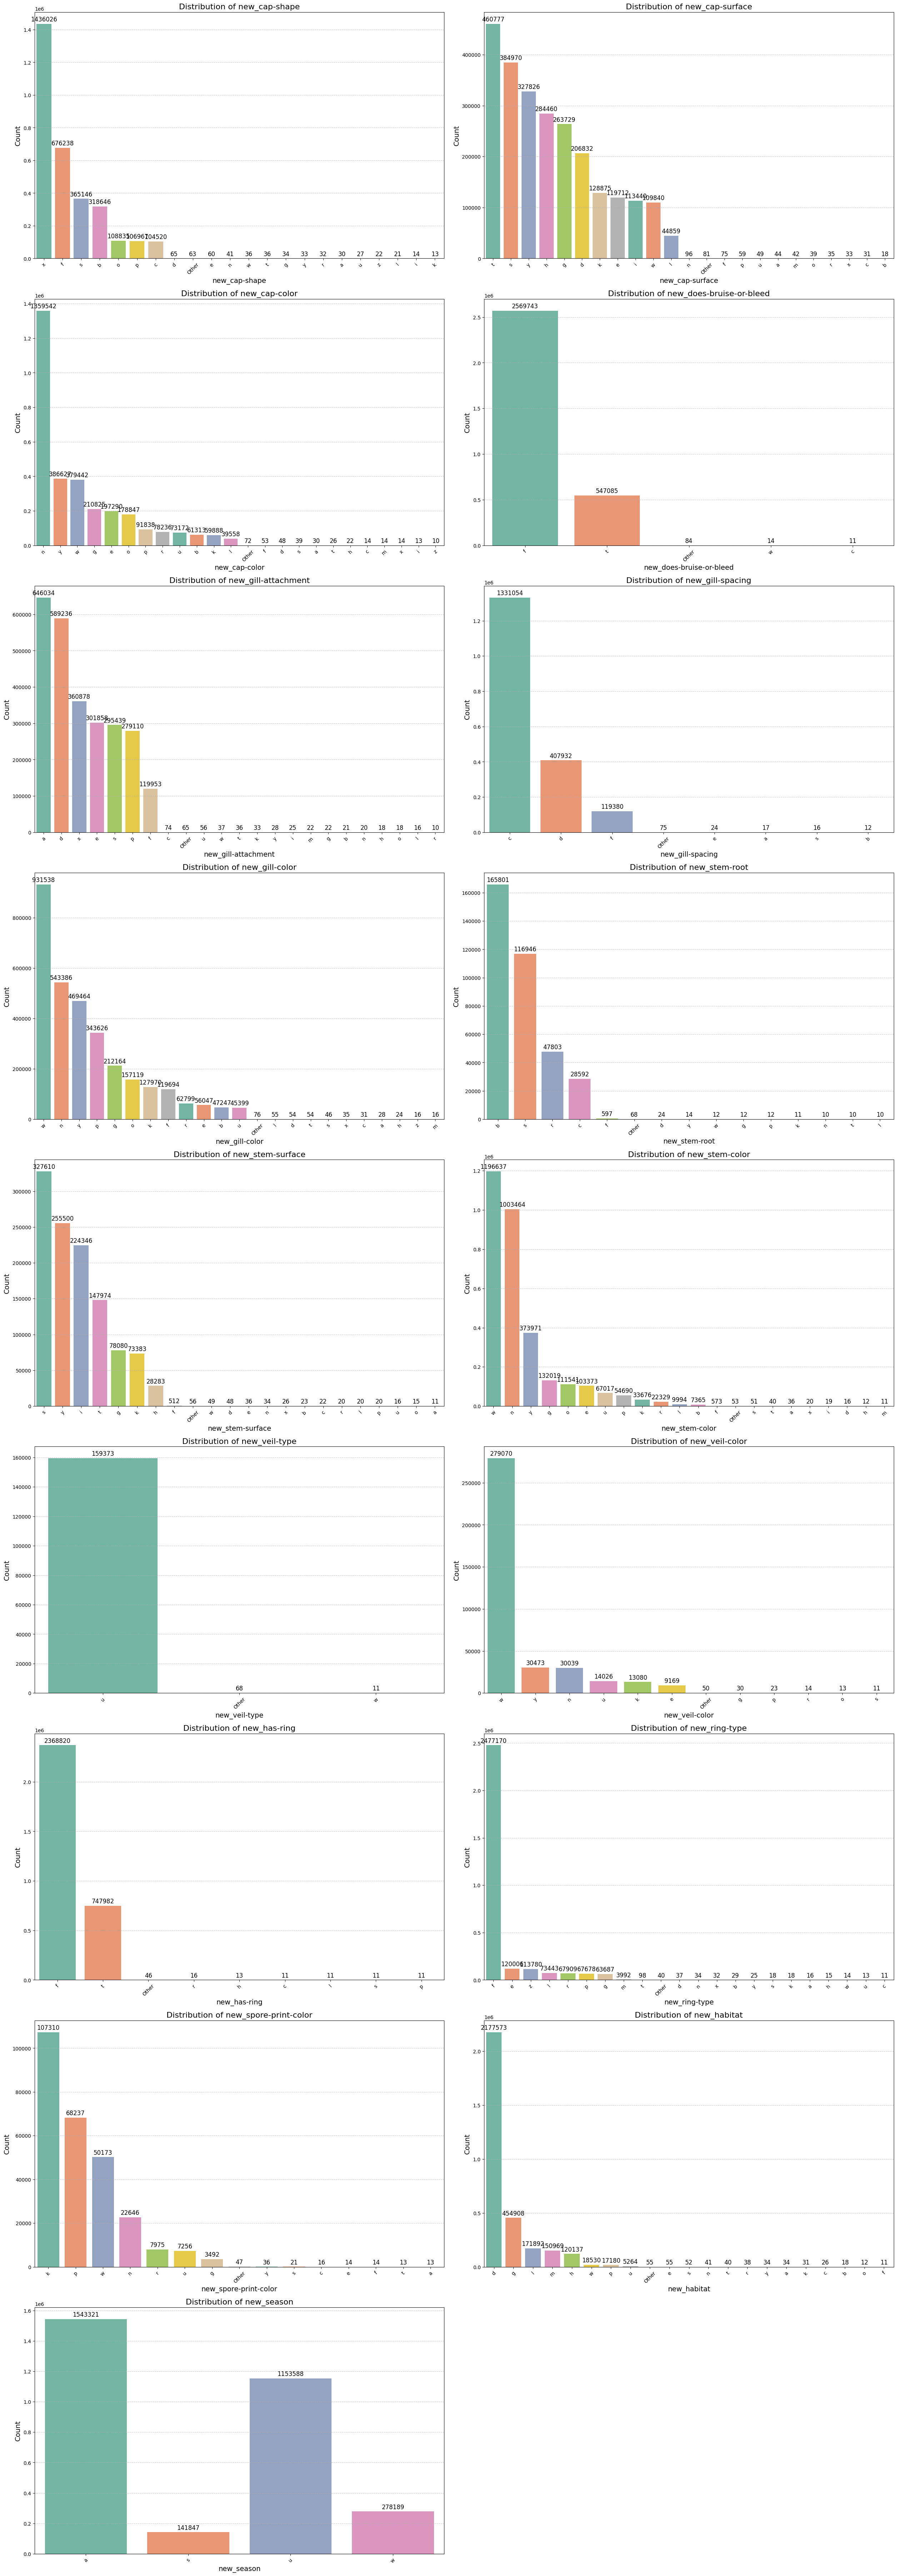

In [88]:
# Determine the number of plots and create subplots
num_plots = len(new_t.columns[5:])
num_cols = 2  # Number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 8), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each column
for i, column in enumerate(new_t.columns[5:]):
    plot_distribution_bar(new_t, column, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">
    
<font size="5"><b>STACKED-BAR BLOT:</b> Visualization of how each category is distributed across the target class</font> 
</div>

In [89]:
def plot_stacked_bar(df, column_name, ax):
    # Create a crosstab DataFrame for stacking
    category_counts = pd.crosstab(df[column_name], df['class'])
    
    # Plot the stacked bar chart
    category_counts.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', edgecolor='k')
    
    # Improve the appearance
    ax.set_title(f'Stacked Bar Plot of Categories in {column_name} by Class', fontsize=16)
    ax.set_xlabel(column_name, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(title='Class', title_fontsize='13', fontsize='12', loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x labels for better readability

    # Add value labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', 
                        xytext=(0, 8), 
                        textcoords='offset points',
                        fontsize=10)

    # Ensure layout fits
    ax.figure.tight_layout()


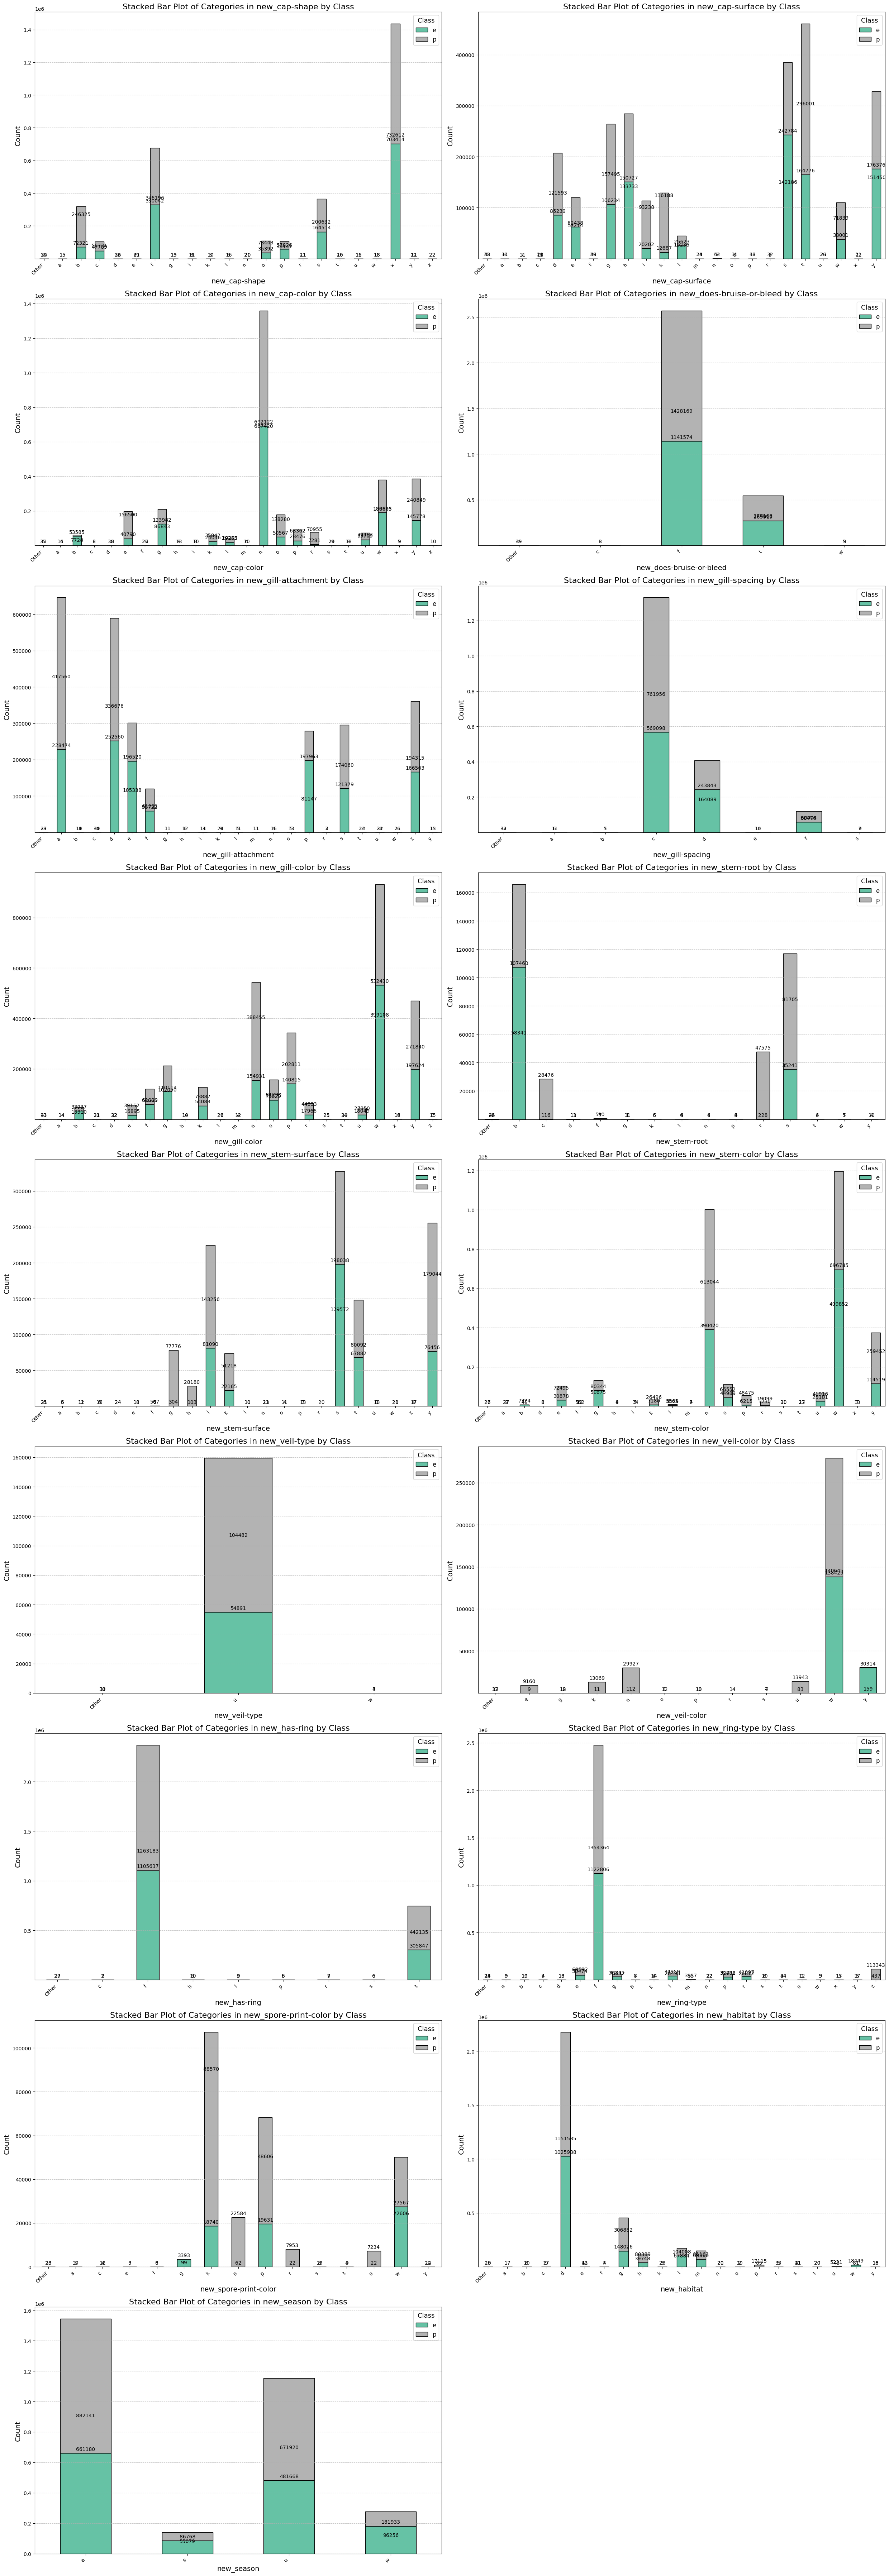

In [90]:
num_plots = len(new_t.columns[5:])
num_cols = 2  # Number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 8), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each column
for i, column in enumerate(new_t.columns[5:]):
    plot_stacked_bar(new_t, column, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">
    
<font size="5"><b>Heat Map:</b> Visualization of category counts across target classes using a heatmap</font> 
</div>

In [91]:
def plot_heatmap(df, column_name, ax):
    # Create a crosstab DataFrame for heatmap
    heatmap_data = pd.crosstab(df[column_name], df['class'])
    
    # Create the heatmap on the provided axis
    sns.heatmap(heatmap_data, 
                annot=True,       # Annotate cells with the numeric value
                cmap='YlGnBu',    # Color map
                fmt='d',          # Format for annotations
                linewidths=0.5,   # Width of lines that will divide each cell
                linecolor='gray', # Color of lines dividing cells
                cbar_kws={'shrink': .8, 'label': 'Count'},  # Color bar options
                annot_kws={"size": 10, "weight": "bold", "color": "black"},  # Font size and color of annotations
                ax=ax)            # Plot on the provided axis
    
    # Set titles and labels
    ax.set_title(f'Heatmap of Category Counts in {column_name} by Target Class', fontsize=16, weight='bold')
    ax.set_xlabel('Class', fontsize=14)
    ax.set_ylabel(column_name, fontsize=14)
    
    # Set tick parameters for better readability
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)


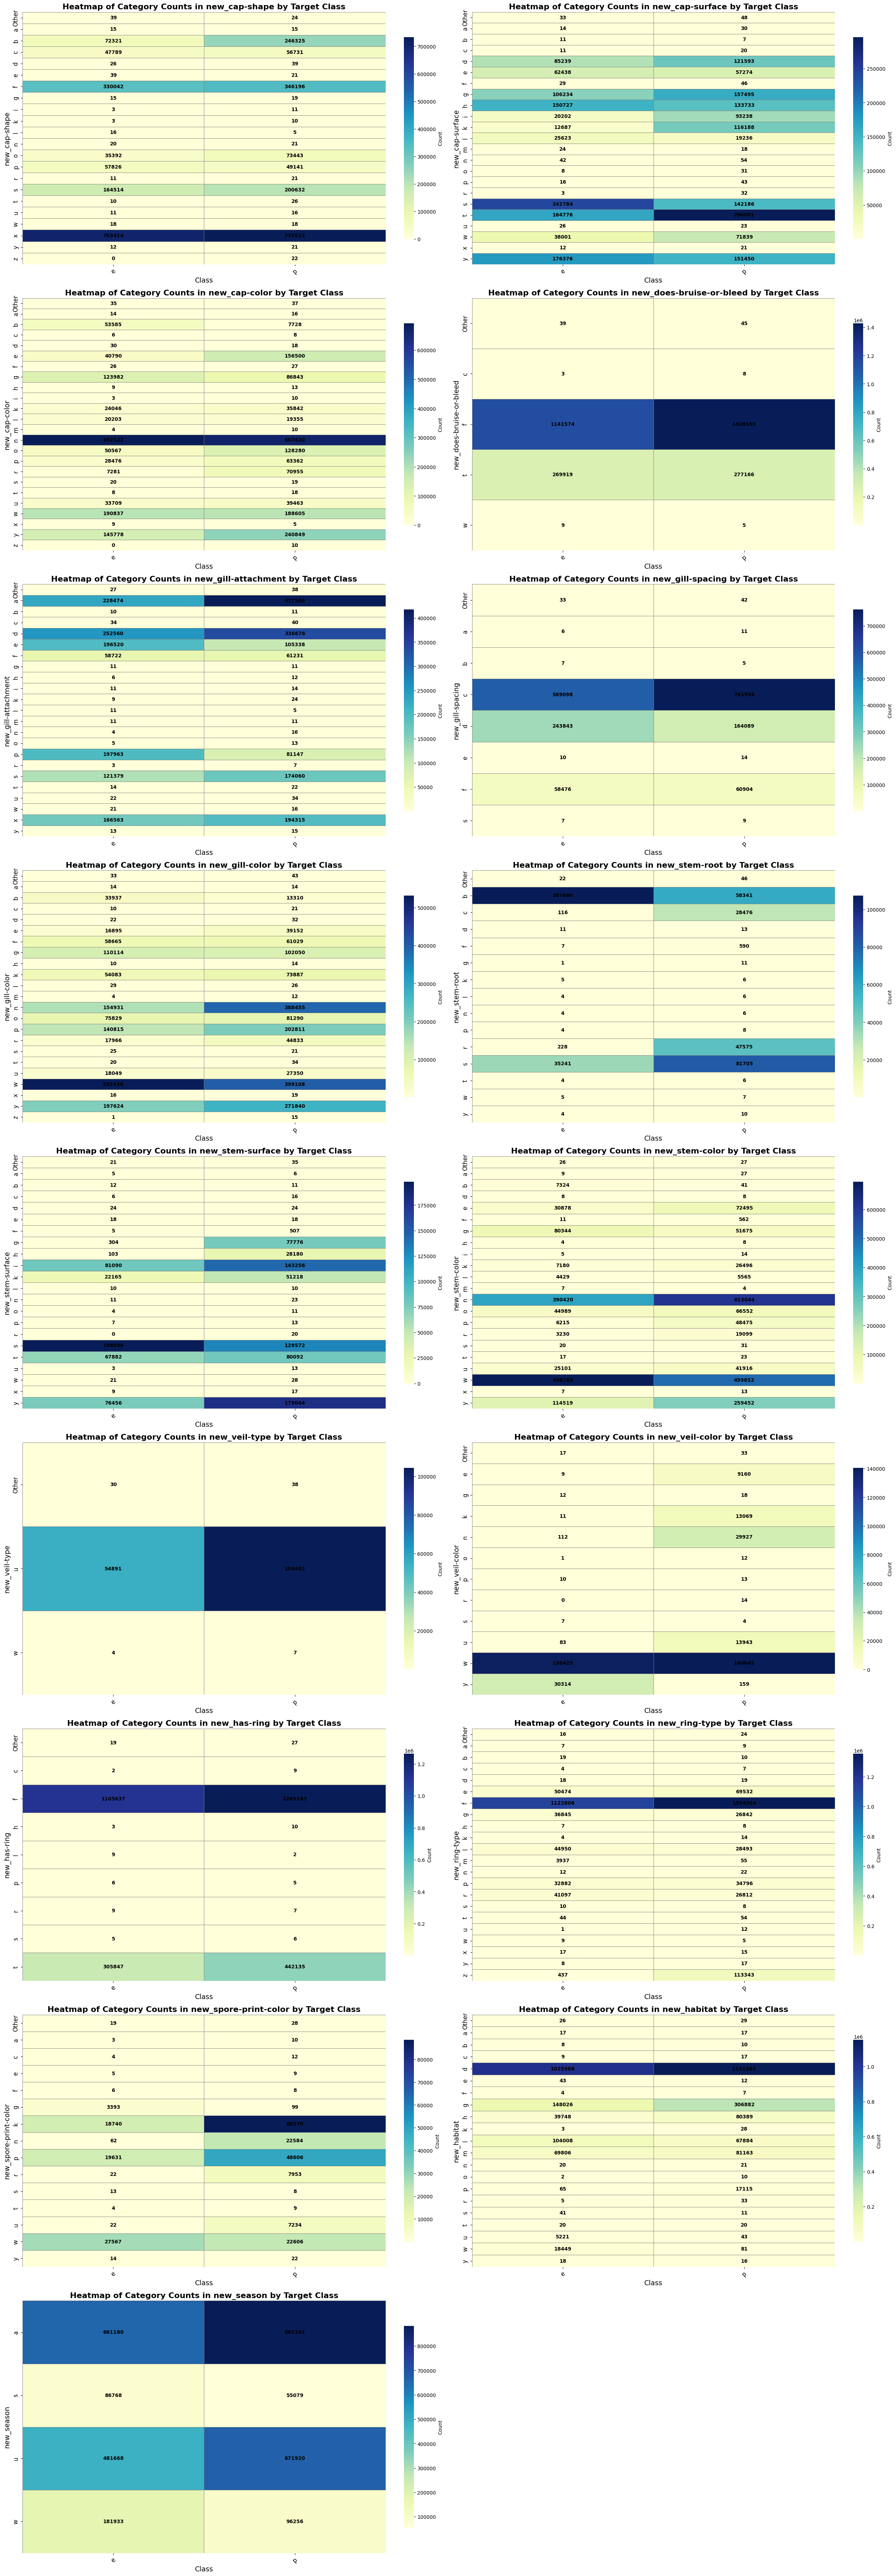

In [92]:
num_plots = len(new_t.columns[5:])
num_cols = 2  # Number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 8), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each column
for i, column in enumerate(new_t.columns[5:]):
    plot_heatmap(new_t, column, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Handling missing values and missingo 🧩</h1>

# `missingo` Library: An Introduction 🚀

The `missingo` library is a Python package designed to help with handling missing data in datasets. It provides a suite of tools for identifying, analyzing, and managing missing values in a user-friendly manner.

<font size="5">Key Features 🎯</font>

- **Detection:** Identify missing values with ease.
- **Visualization:** Get visual insights into missing data patterns.
- **Imputation:** Handle missing data with various imputation methods.
- **Integration:** Seamlessly integrates with popular data science libraries like Pandas and Scikit-learn.


<font size="5">Visual Output 📈</font>

- **Bar Plot:** Shows number of missing values for each column in the DataFrame.
- **Matrix Plot:** Displays missing data patterns.
- **Heatmap:** Highlights the density of missing data.
- **Dendrogram:** Displays the hierarchical clustering of missing data patterns across columns.

In [ ]:
import missingno as miss

<Axes: >

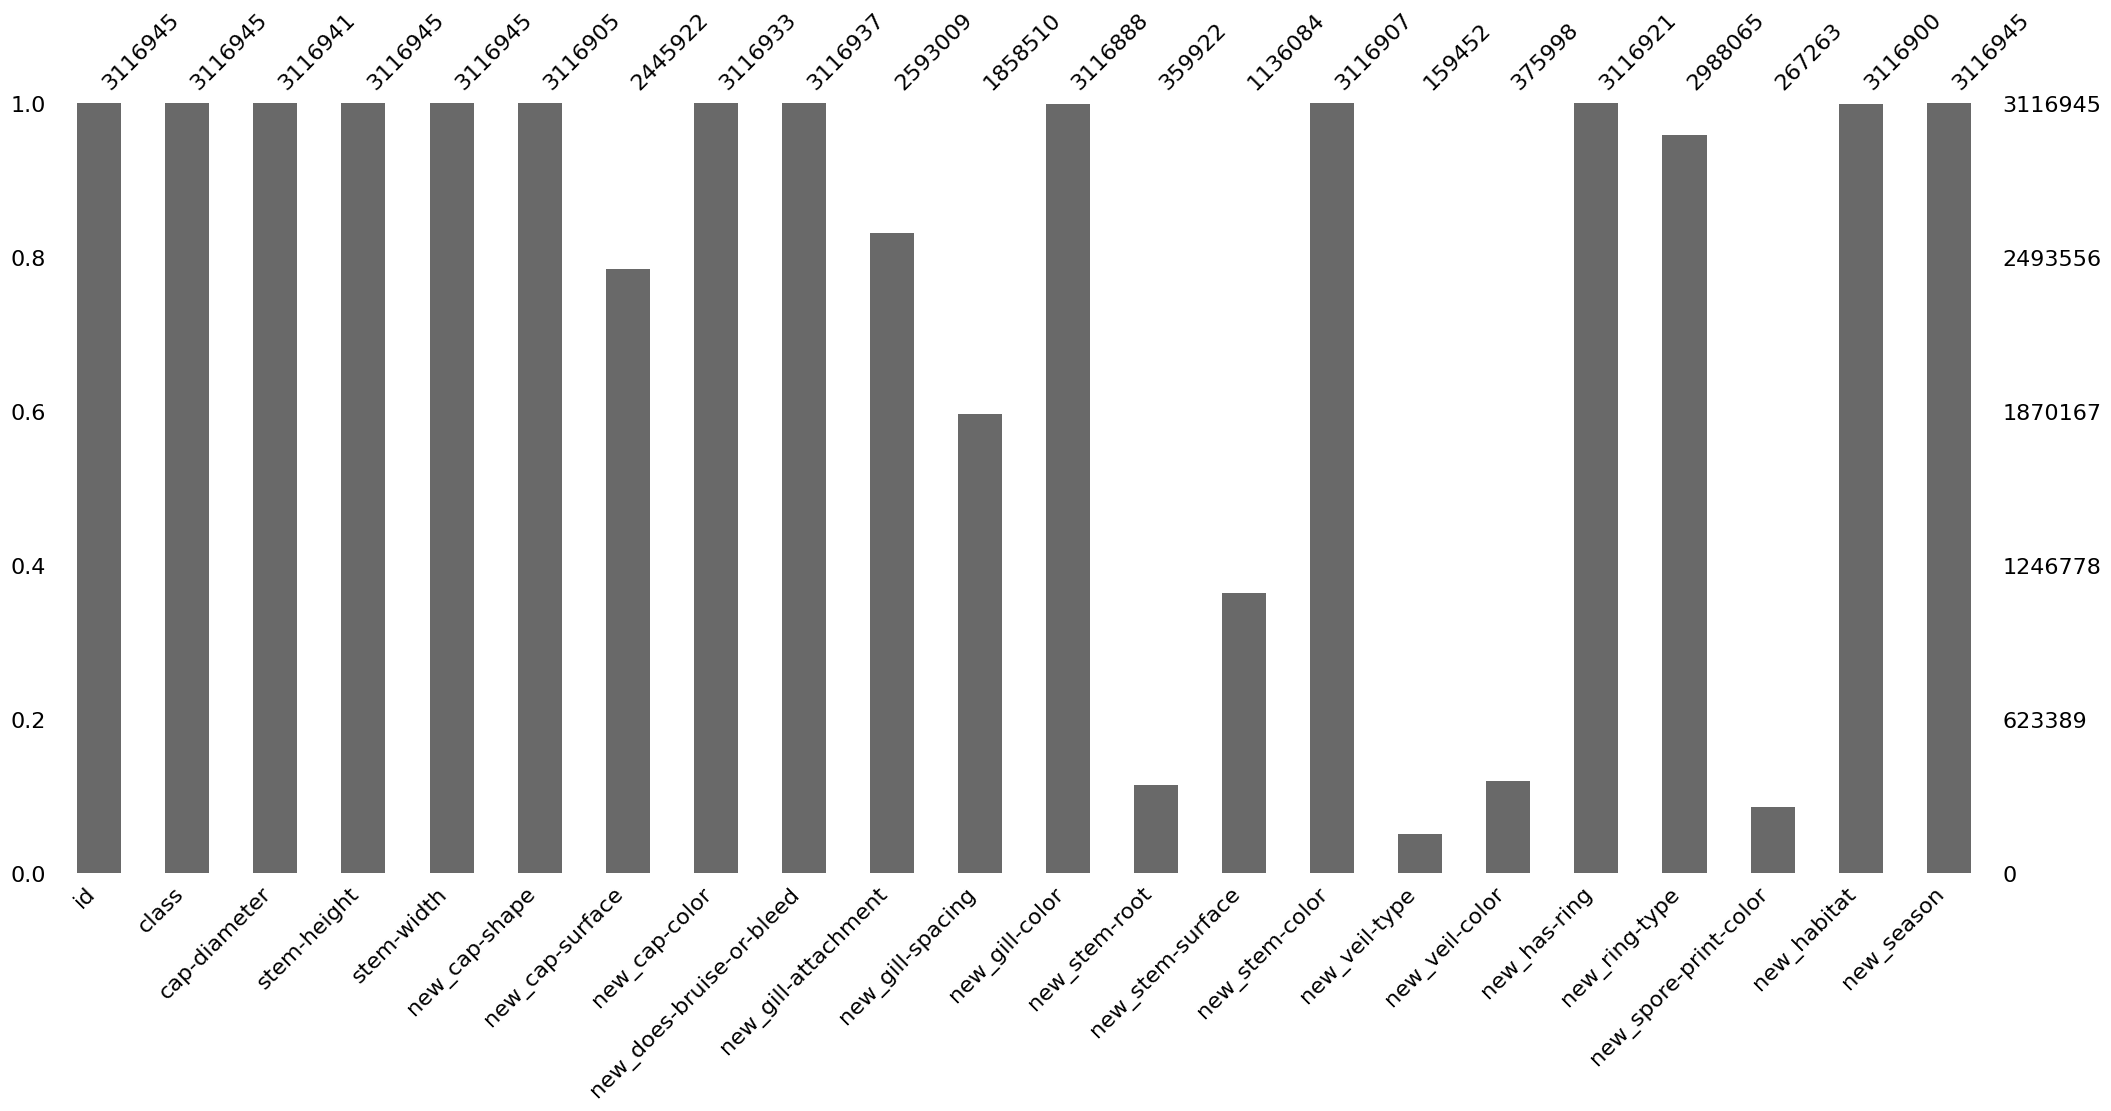

In [93]:
miss.bar(new_t)

<Axes: >

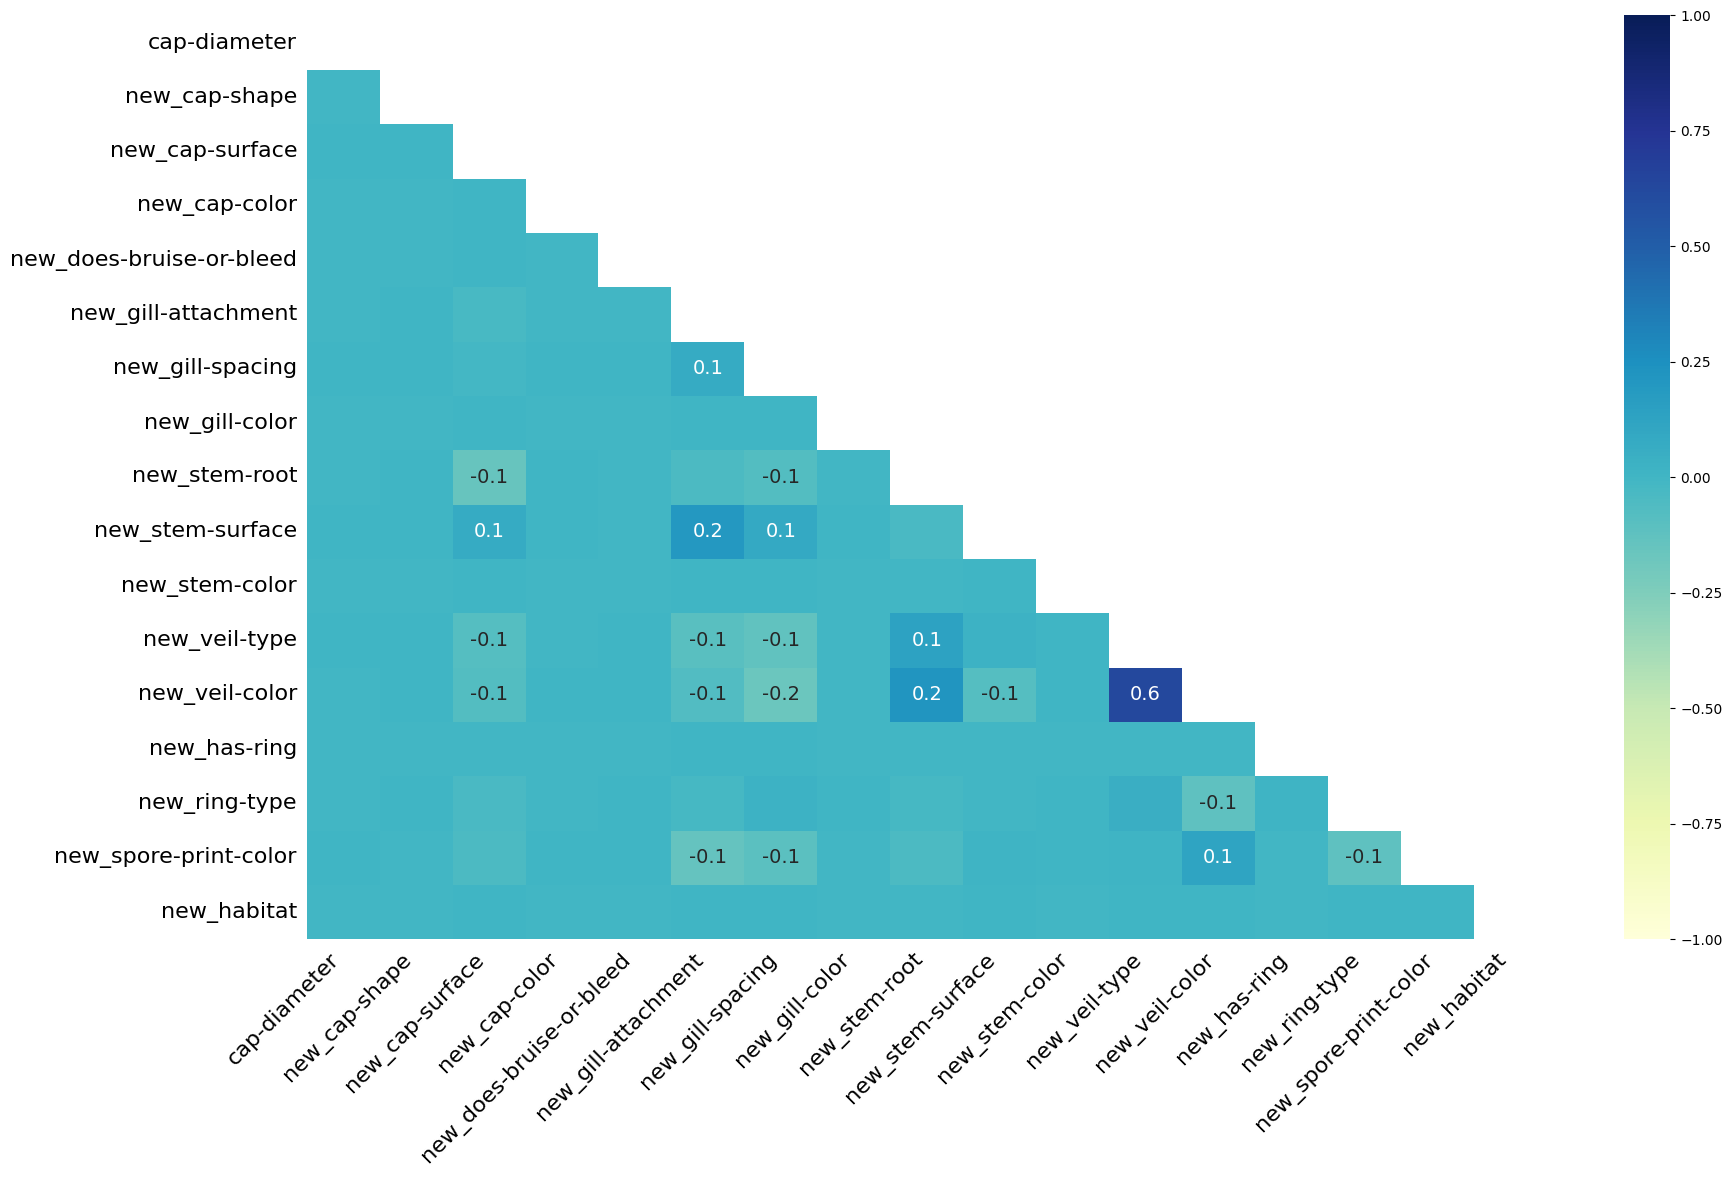

In [94]:
miss.heatmap(new_t, cmap='YlGnBu')

<Axes: >

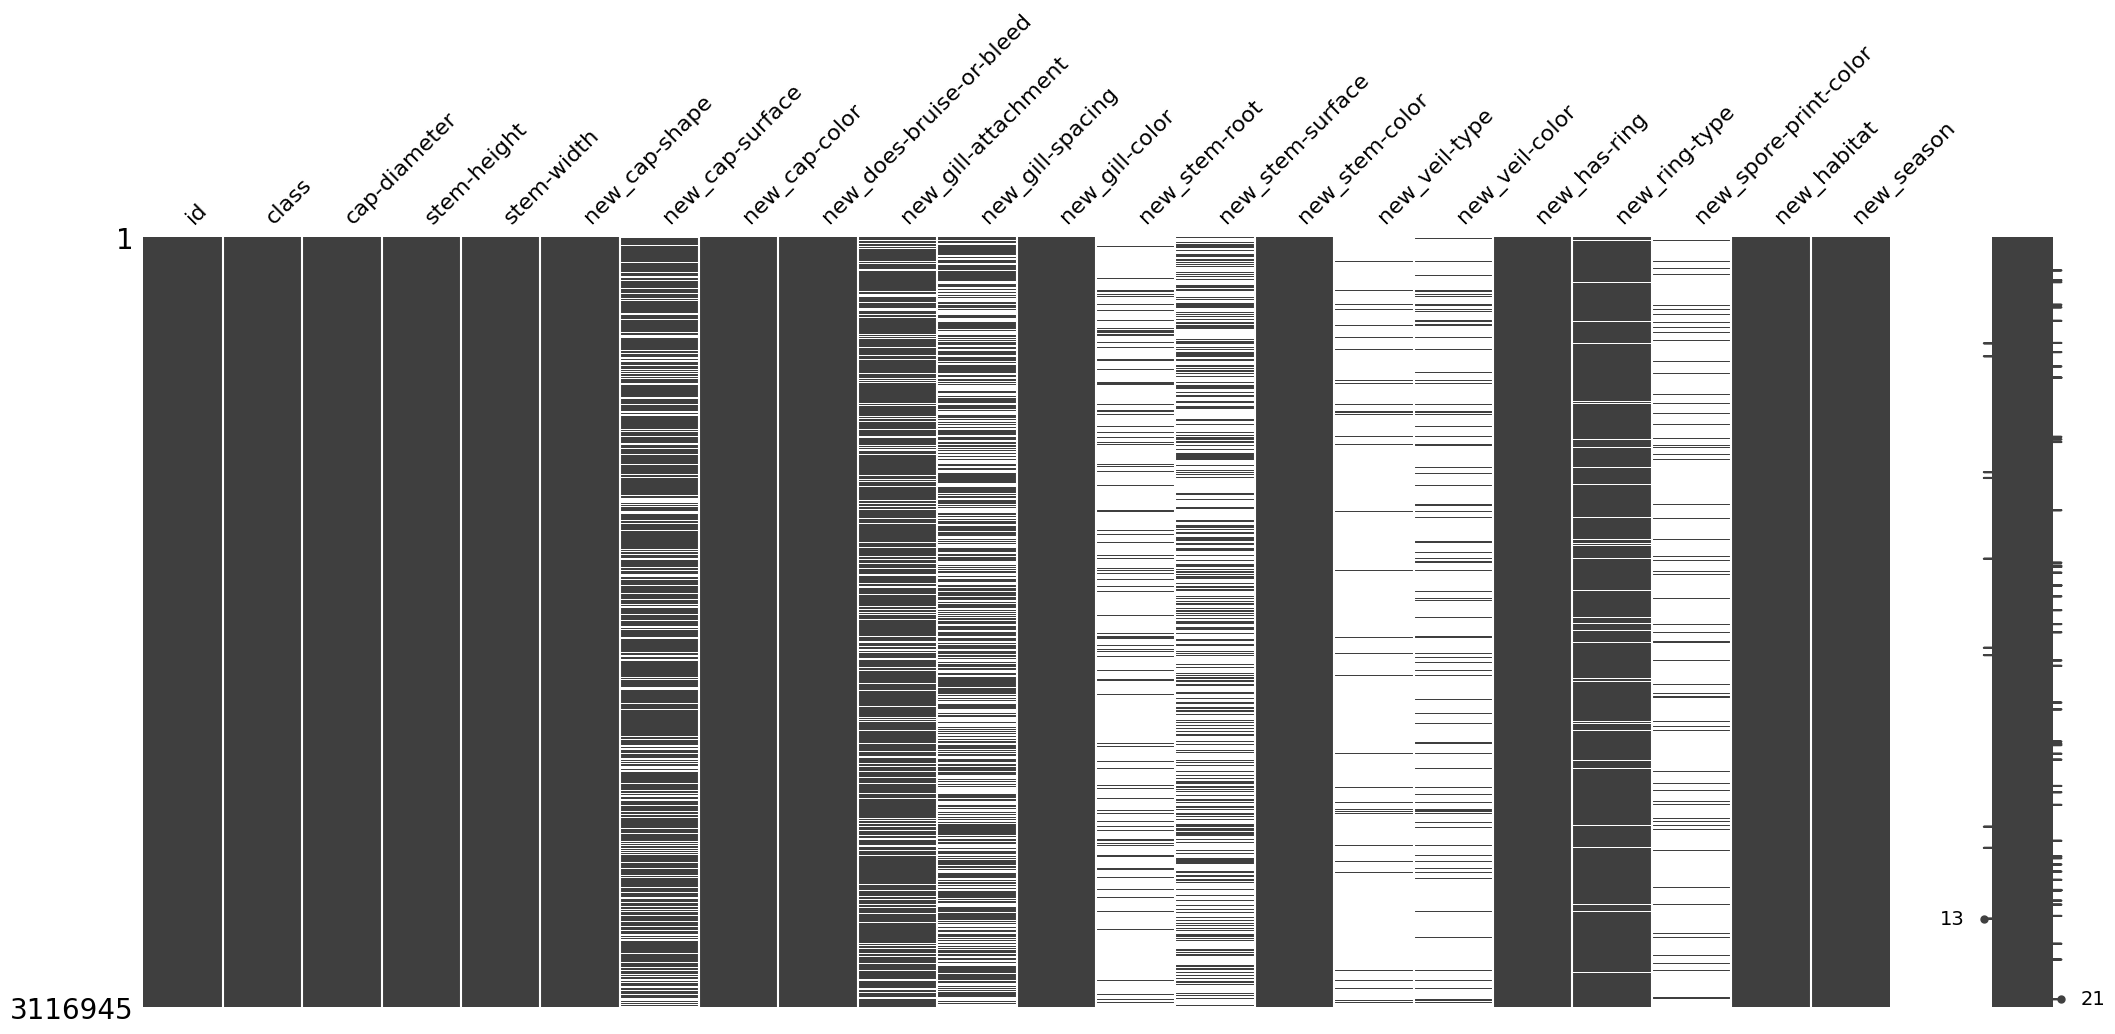

In [95]:
miss.matrix(new_t)

<Axes: >

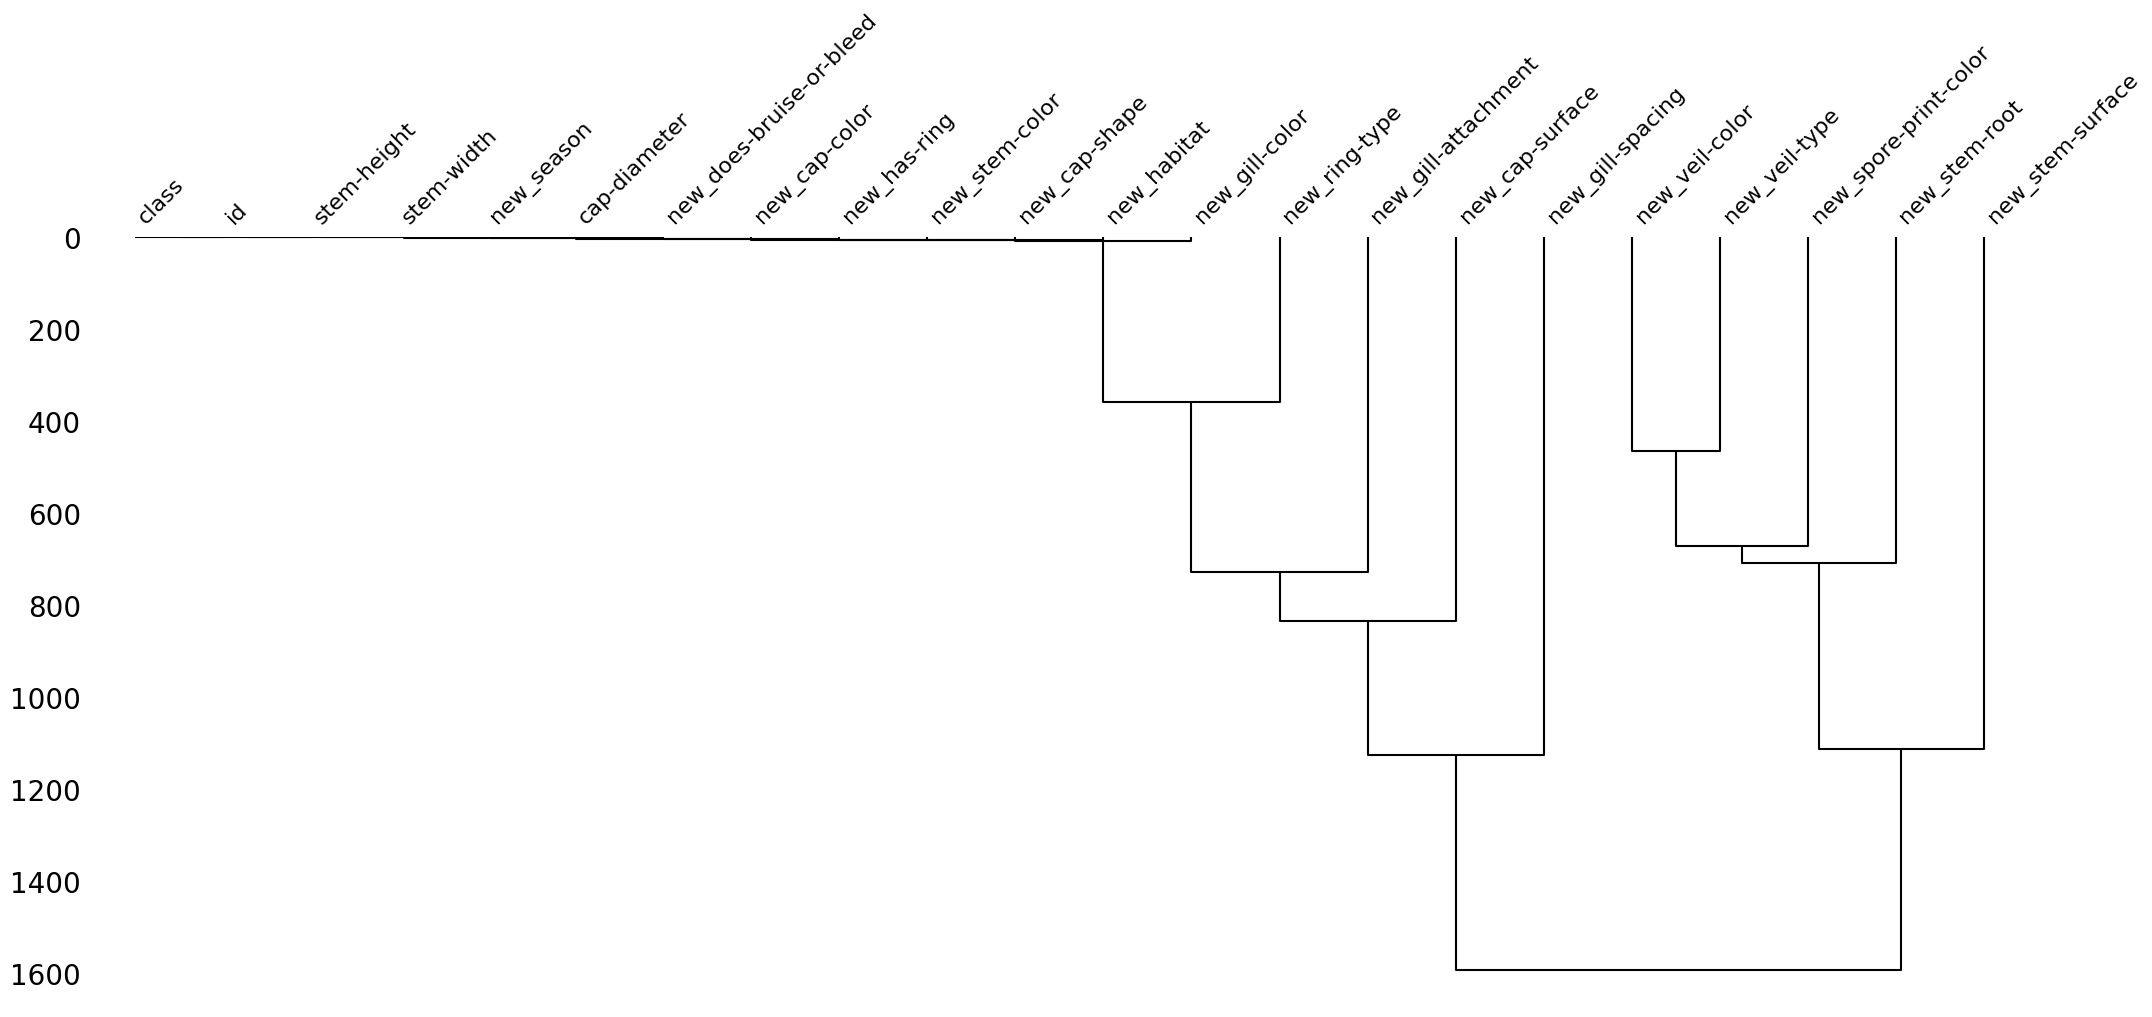

In [96]:
miss.dendrogram(new_t)

In [97]:
new_t.isnull().sum()/len(new_t)

id                          0.000000
class                       0.000000
cap-diameter                0.000001
stem-height                 0.000000
stem-width                  0.000000
new_cap-shape               0.000013
new_cap-surface             0.215282
new_cap-color               0.000004
new_does-bruise-or-bleed    0.000003
new_gill-attachment         0.168093
new_gill-spacing            0.403740
new_gill-color              0.000018
new_stem-root               0.884527
new_stem-surface            0.635514
new_stem-color              0.000012
new_veil-type               0.948843
new_veil-color              0.879370
new_has-ring                0.000008
new_ring-type               0.041348
new_spore-print-color       0.914255
new_habitat                 0.000014
new_season                  0.000000
dtype: float64

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">
    
<b>Drop columns with high ratio of missing values</b></div>

In [98]:
high_null_val = []
for i in new_t.columns:
    if new_t[i].isnull().sum()/len(new_t) > 0.85:
        high_null_val.append(i)
high_null_val

['new_stem-root', 'new_veil-type', 'new_veil-color', 'new_spore-print-color']

In [294]:
df = new_t.drop(high_null_val,axis=1)

<div class="alert alert-block alert-info"> 📌 Please note that dropping columns with a high proportion of missing values may not always be advisable. Removing any column results in the loss of potentially valuable information. Unless you're a domain expert and assess that a column is not useful or relevant, it is generally best to avoid dropping columns solely based on the percentage of missing values. Adhering to best practices involves carefully evaluating the significance of each column and considering the impact of its removal on the overall dataset.</div>

But since I am just playing around I can, its `Ok` for me 😒

In [295]:
df.head()

id class  cap-diameter  stem-height  stem-width new_cap-shape  \
0   0     e          8.80         4.51       15.39             f   
1   1     p          4.51         4.79        6.48             x   
2   2     e          6.94         6.85        9.93             f   
3   3     e          3.88         4.16        6.53             f   
4   4     e          5.85         3.37        8.36             x   

  new_cap-surface new_cap-color new_does-bruise-or-bleed new_gill-attachment  \
0               s             u                        f                   a   
1               h             o                        f                   a   
2               s             b                        f                   x   
3               y             g                        f                   s   
4               l             w                        f                   d   

  new_gill-spacing new_gill-color new_stem-surface new_stem-color  \
0                c              w              NaN              w   
1                c              n                y              o   
2                c              w                s              n   
3              NaN              g              NaN              w   
4              NaN              w              NaN              w   

  new_has-ring new_ring-type new_habitat new_season  
0            f             f           d          a  
1            t             z           d          w  
2            f             f           l          w  
3            f             f           d          u  
4            f             f           g          a

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Some pre-processing 📦</h1>

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">

<ol>
    <li><b>Feature with high cardinality:</b> For features containing large number of categories,  categories are replaced by the frequency of the category.</li>
    <li><b>Feature with low cardinality:</b> Label encoding is performed on these features</li>
</ol>
        
</div>

In [101]:
from sklearn.preprocessing import StandardScaler

def frequency_encoding(df, column):
    freq = df[column].value_counts()
    df[column] = df[column].map(freq)
    return df

In [102]:

high_cardinality_cols = ['new_cap-shape', 'new_cap-surface', 'new_cap-color', 'new_gill-attachment', 'new_gill-color', 'new_stem-surface', 'new_stem-color', 'new_ring-type', 'new_habitat']

# Apply frequency encoding
for col in high_cardinality_cols:
    df = frequency_encoding(df, col)

# Initialize the scaler
scaler = StandardScaler()

# Normalize the frequency encoded columns
df[high_cardinality_cols] = scaler.fit_transform(df[high_cardinality_cols])

In [103]:
from sklearn.preprocessing import LabelEncoder
low_cardinality_cols = ['new_does-bruise-or-bleed', 'new_gill-spacing', 'new_has-ring', 'new_season']
label_encoders = {}
for column in low_cardinality_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoder for potential reverse transformation

In [104]:
df.head()

id class  cap-diameter  stem-height  stem-width  new_cap-shape  \
0   0     e          8.80         4.51       15.39      -0.415692   
1   1     p          4.51         4.79        6.48       1.030355   
2   2     e          6.94         6.85        9.93      -0.415692   
3   3     e          3.88         4.16        6.53      -0.415692   
4   4     e          5.85         3.37        8.36       1.030355   

   new_cap-surface  new_cap-color  new_does-bruise-or-bleed  \
0         0.753684      -1.181277                         2   
1        -0.079120      -0.992207                         2   
2         0.753684      -1.202495                         2   
3         0.280201      -0.934993                         2   
4        -2.064400      -0.633308                         2   

   new_gill-attachment  new_gill-spacing  new_gill-color  new_stem-surface  \
0             1.162632                 3        1.343985               NaN   
1             1.162632                 3        0.083736          0.326483   
2            -0.524021                 3        1.343985          1.133273   
3            -0.911082                 8       -0.991673               NaN   
4             0.826681                 8        1.343985               NaN   

   new_stem-color  new_has-ring  new_ring-type  new_habitat  new_season  
0        0.829976             2       0.454106     0.653395           0  
1       -1.719044             8      -2.175416     0.653395           3  
2        0.376190             2       0.454106    -1.652947           3  
3        0.829976             2       0.454106     0.653395           2  
4        0.829976             2       0.454106    -1.327506           0

In [105]:
df.isnull().sum()/len(df)

id                          0.000000
class                       0.000000
cap-diameter                0.000001
stem-height                 0.000000
stem-width                  0.000000
new_cap-shape               0.000013
new_cap-surface             0.215282
new_cap-color               0.000004
new_does-bruise-or-bleed    0.000000
new_gill-attachment         0.168093
new_gill-spacing            0.000000
new_gill-color              0.000018
new_stem-surface            0.635514
new_stem-color              0.000012
new_has-ring                0.000000
new_ring-type               0.041348
new_habitat                 0.000014
new_season                  0.000000
dtype: float64

In [296]:
new_df = klib.convert_datatypes(df)
del df

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">

<font size="5"><b>Filling Null Values:</b></font>
<ul>
    <li><b>Categorical Features:</b> Filled with mode value</li>
    <li><b>Continuous Features:</b> Filled with median value</li>
</ul>
</div>

In [107]:
from sklearn.impute import SimpleImputer

# For numerical columns
num_imputer = SimpleImputer(strategy='median')
new_df[['cap-diameter', 'stem-height', 'stem-width']] = num_imputer.fit_transform(new_df[['cap-diameter', 'stem-height', 'stem-width']])

In [108]:

# For categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
new_df[['new_cap-shape','new_cap-color', 'new_gill-attachment','new_gill-color','new_stem-color', 'new_ring-type', 'new_habitat']] = cat_imputer.fit_transform(new_df[['new_cap-shape','new_cap-color', 'new_gill-attachment','new_gill-color','new_stem-color', 'new_ring-type', 'new_habitat']])

In [109]:
new_df.isnull().sum()/len(new_df)

id                          0.000000
class                       0.000000
cap-diameter                0.000000
stem-height                 0.000000
stem-width                  0.000000
new_cap-shape               0.000000
new_cap-surface             0.215282
new_cap-color               0.000000
new_does-bruise-or-bleed    0.000000
new_gill-attachment         0.000000
new_gill-spacing            0.000000
new_gill-color              0.000000
new_stem-surface            0.635514
new_stem-color              0.000000
new_has-ring                0.000000
new_ring-type               0.000000
new_habitat                 0.000000
new_season                  0.000000
dtype: float64

In [293]:
new_df.head()

id  class  cap-diameter  stem-height  stem-width  new_cap-shape  \
0   0      0          8.80         4.51       15.39      -0.415692   
1   1      1          4.51         4.79        6.48       1.030355   
2   2      0          6.94         6.85        9.93      -0.415692   
3   3      0          3.88         4.16        6.53      -0.415692   
4   4      0          5.85         3.37        8.36       1.030355   

   new_cap-surface  new_cap-color  new_does-bruise-or-bleed  \
0         0.753684      -1.181277                         2   
1        -0.079120      -0.992207                         2   
2         0.753684      -1.202495                         2   
3         0.280201      -0.934993                         2   
4        -2.064400      -0.633308                         2   

   new_gill-attachment  new_gill-spacing  new_gill-color  new_stem-color  \
0             1.162632                 3        1.343985        0.829976   
1             1.162632                 3        0.083736       -1.719044   
2            -0.524021                 3        1.343985        0.376190   
3            -0.911082                 8       -0.991673        0.829976   
4             0.826681                 8        1.343985        0.829976   

   new_has-ring  new_ring-type  new_habitat  new_season  
0             2       0.454106     0.653395           0  
1             8      -2.175416     0.653395           3  
2             2       0.454106    -1.652947           3  
3             2       0.454106     0.653395           2  
4             2       0.454106    -1.327506           0

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">
    
<font size="5"><b>Dist Plot(Klib):</b>  Creates a distribution plot for visualizing the distribution and density of a given numerical variable.</font>
</div>

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='new_season', ylabel='Density'>

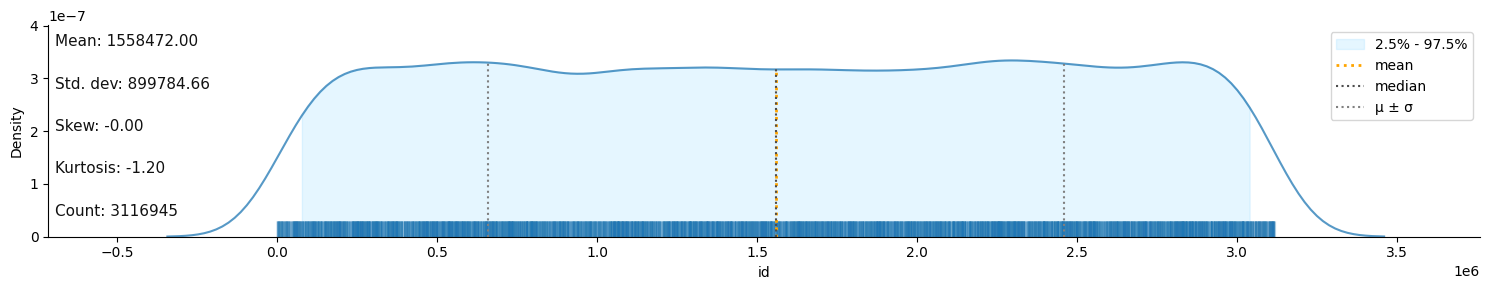

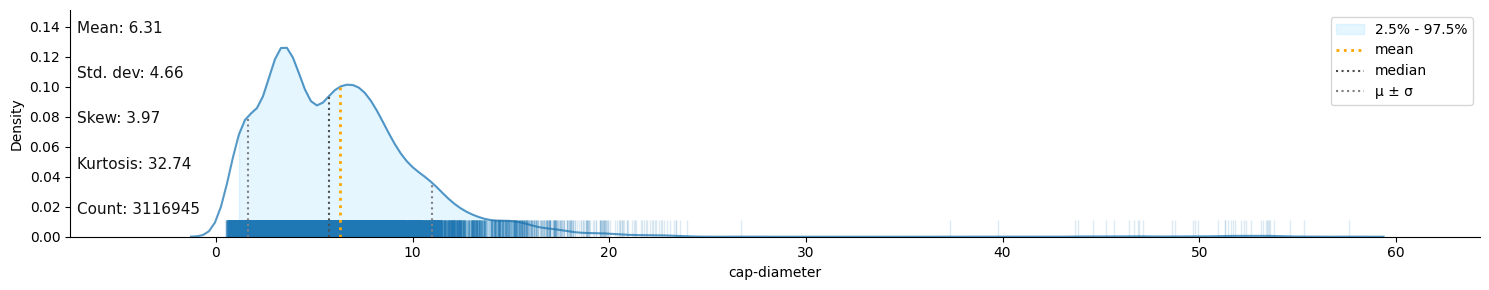

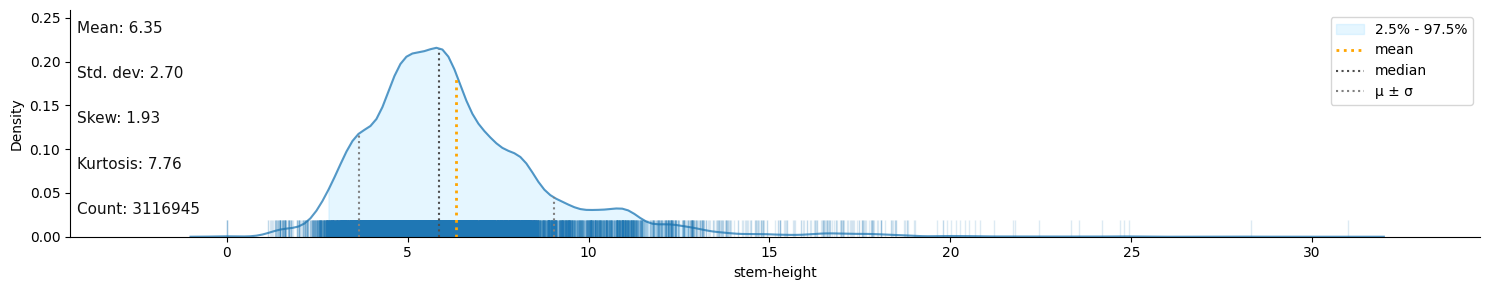

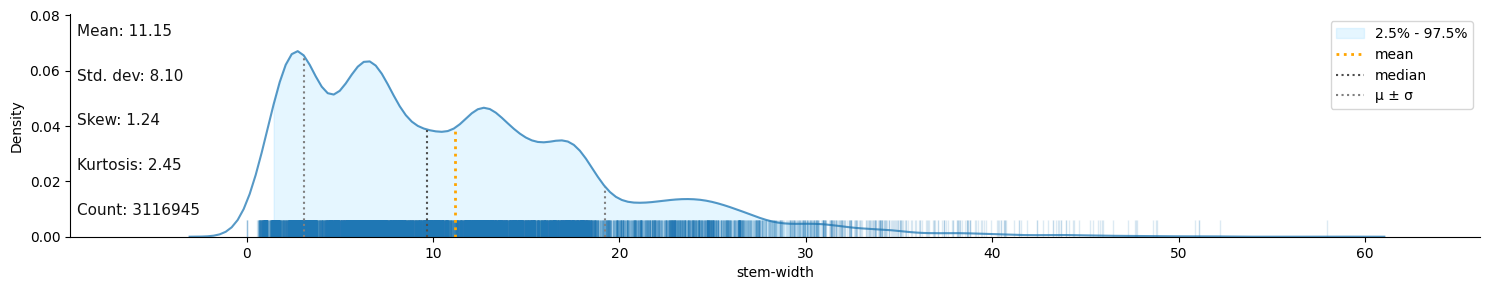

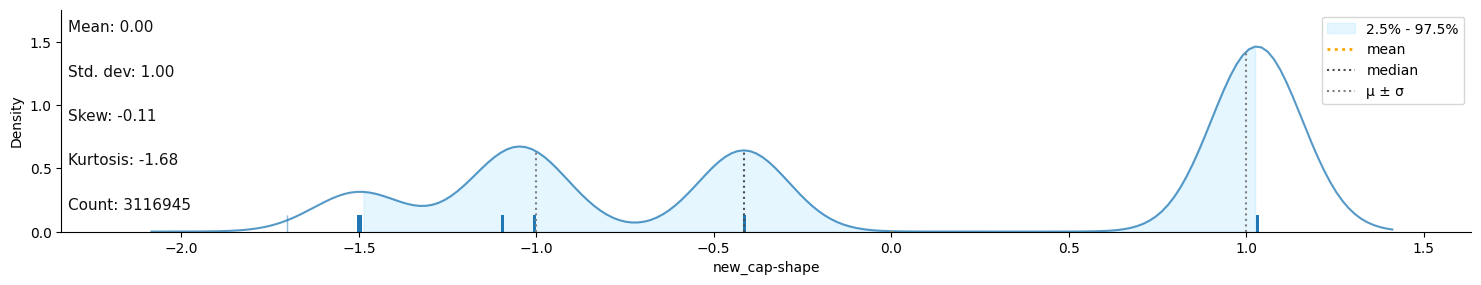

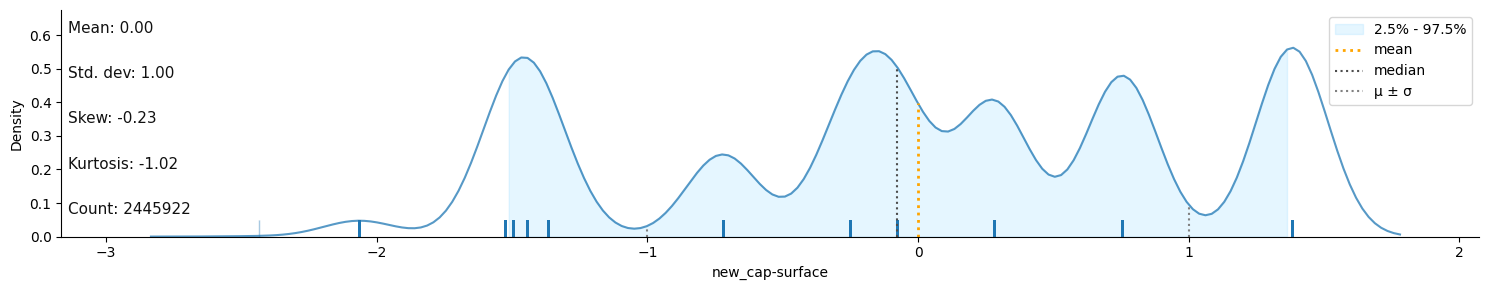

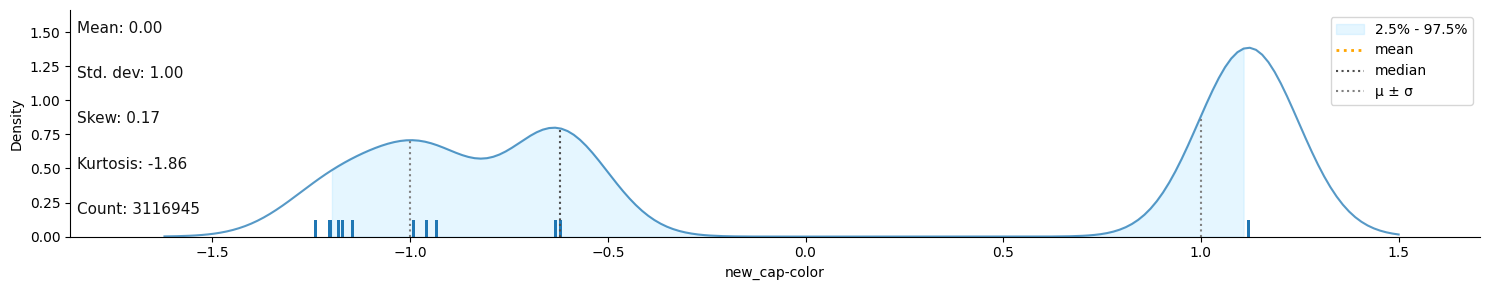

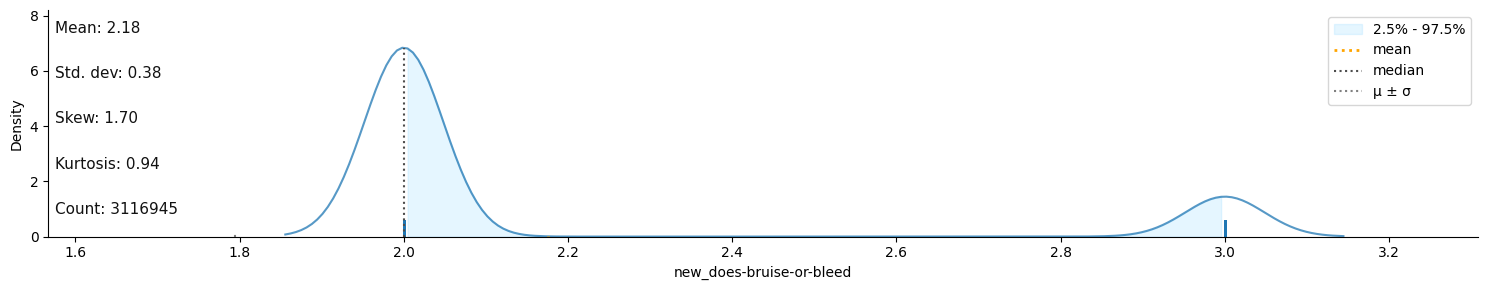

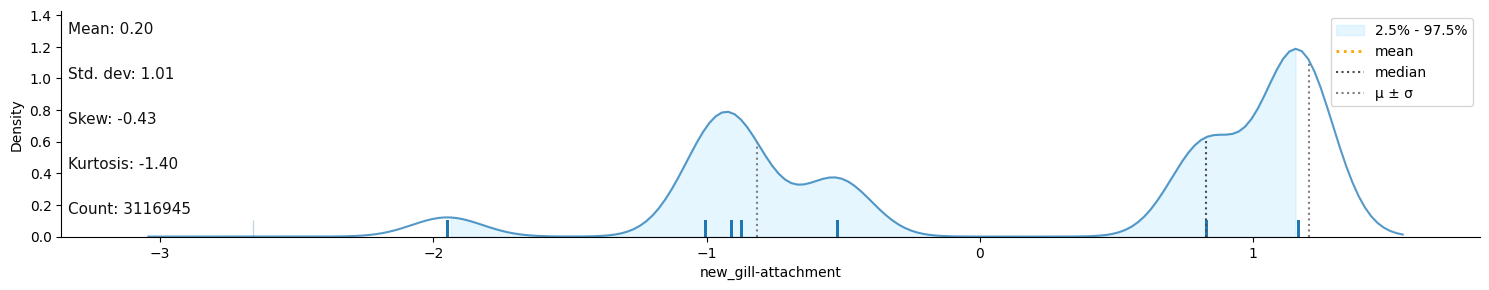

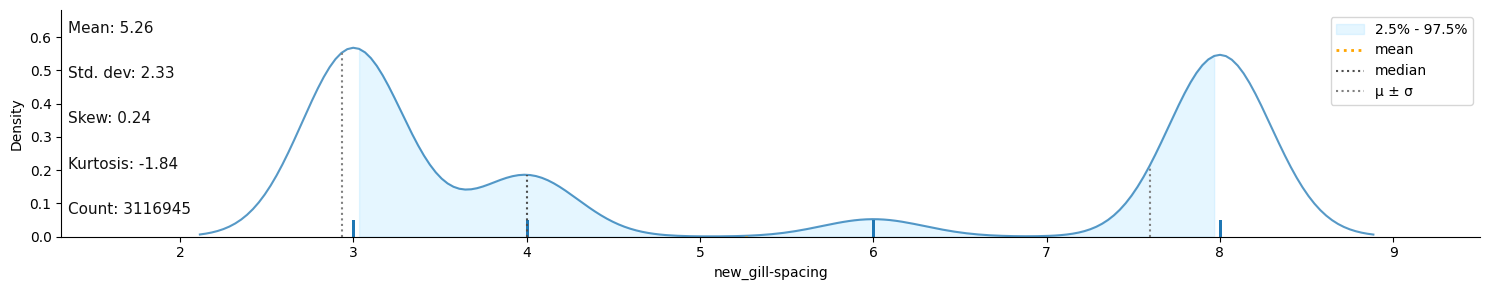

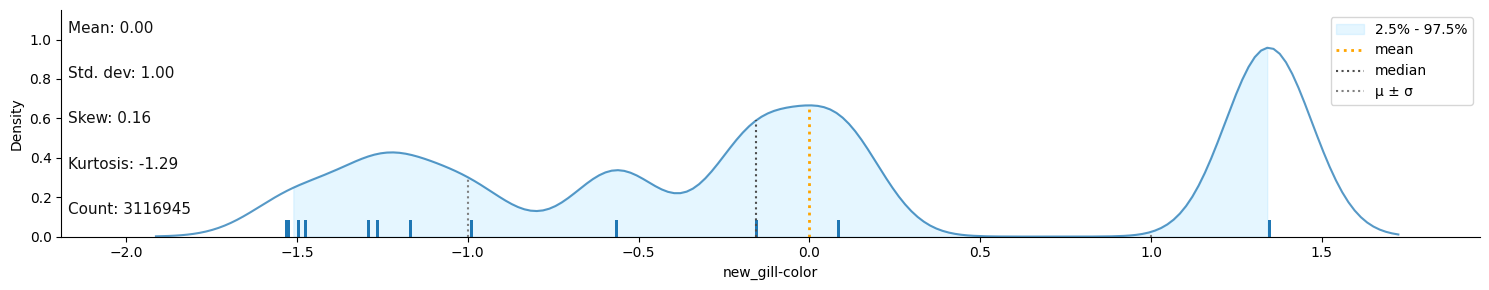

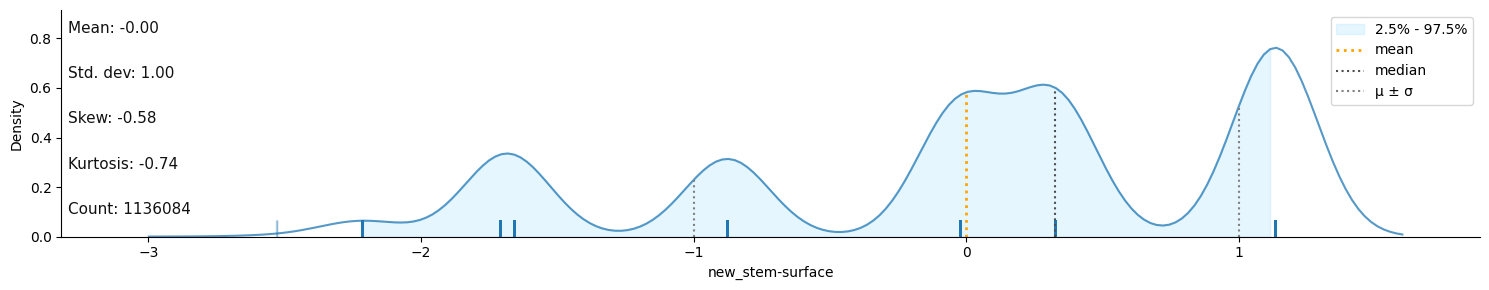

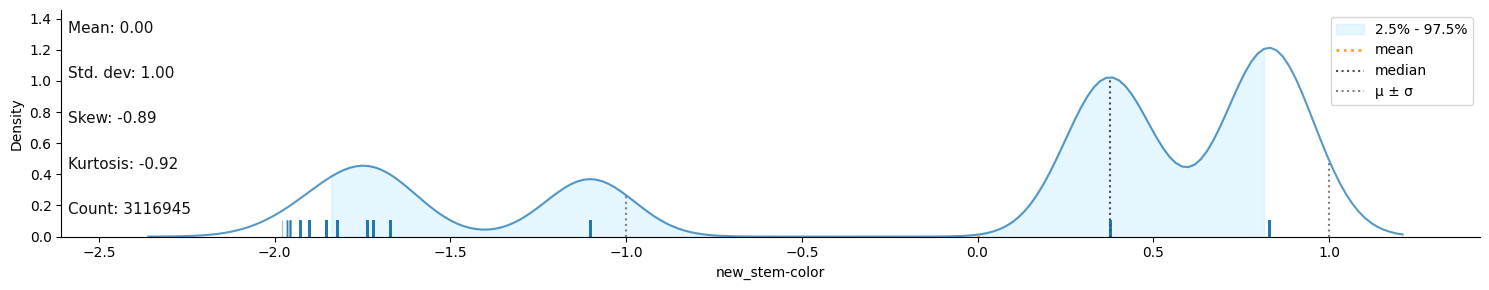

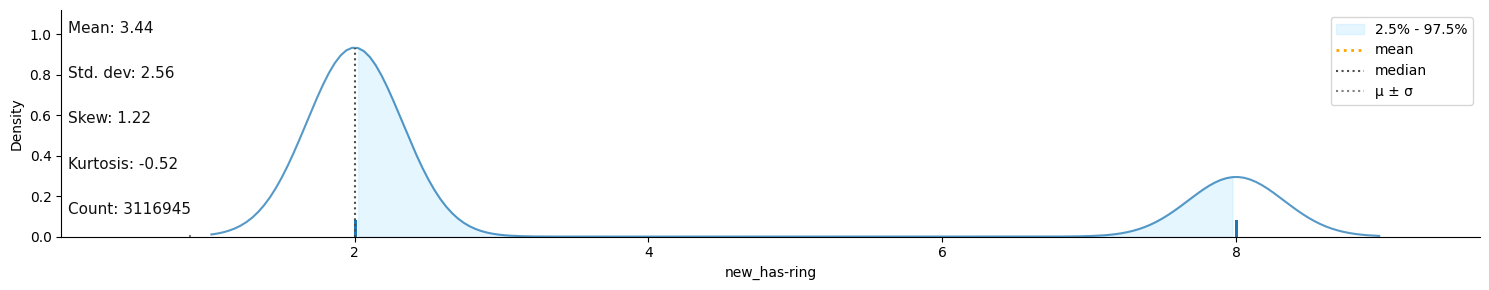

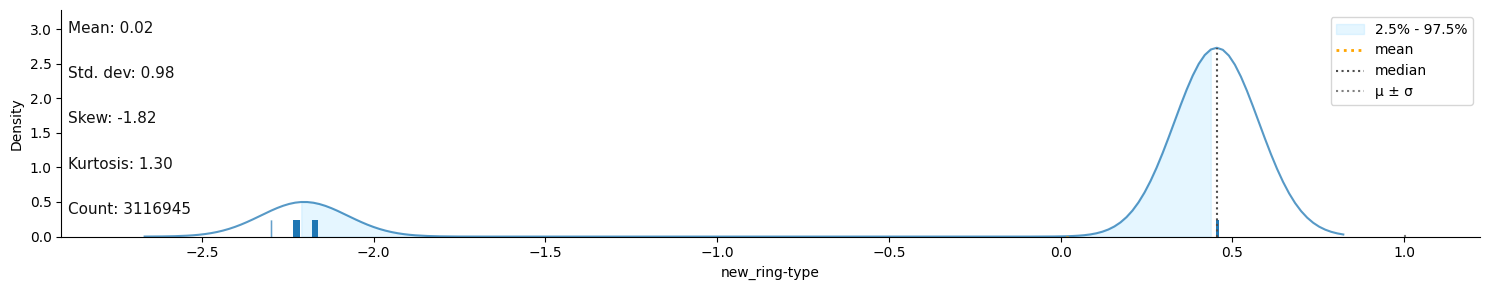

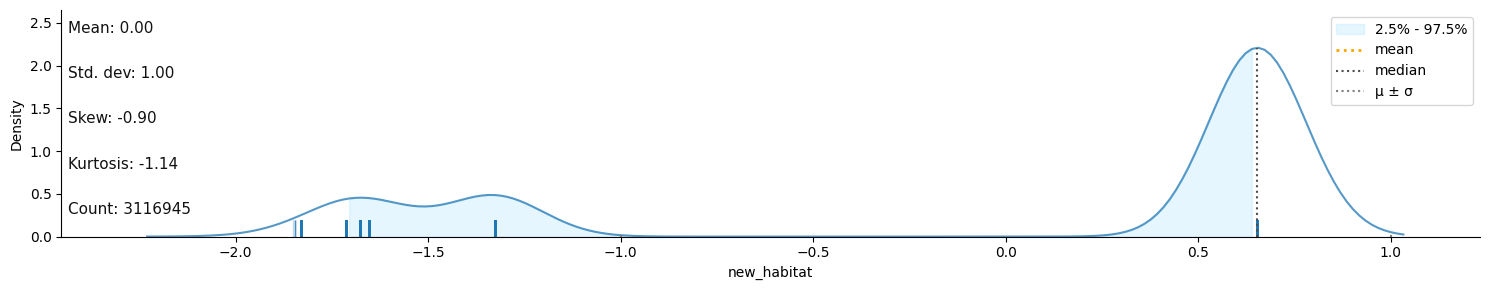

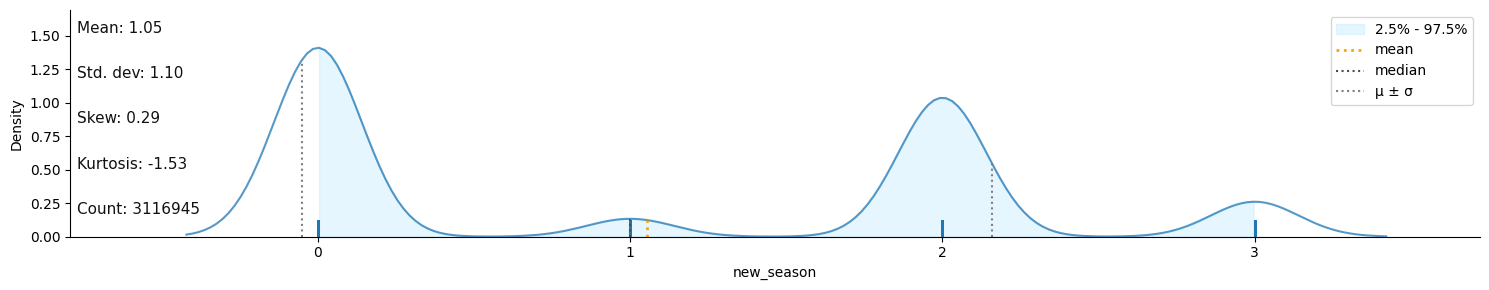

In [111]:
klib.dist_plot(new_df)

In [112]:
new_df.drop('new_stem-surface',axis=1,inplace=True)

In [113]:


new_df[['new_cap-surface']] = cat_imputer.fit_transform(new_df[['new_cap-surface']])

In [114]:
new_df.isnull().sum()

id                          0
class                       0
cap-diameter                0
stem-height                 0
stem-width                  0
new_cap-shape               0
new_cap-surface             0
new_cap-color               0
new_does-bruise-or-bleed    0
new_gill-attachment         0
new_gill-spacing            0
new_gill-color              0
new_stem-color              0
new_has-ring                0
new_ring-type               0
new_habitat                 0
new_season                  0
dtype: int64

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">

<b>Encoding target variable : encoding target `class` using `Label_Encoder`</b>
</div>

In [297]:
encode = ['class']
rev_encode_class = {}
for column in encode:
    le = LabelEncoder()
    new_df[column] = le.fit_transform(new_df[column])
    rev_encode_class[column] = le
    


In [116]:
new_df.dtypes

id                            int32
class                         int64
cap-diameter                float32
stem-height                 float32
stem-width                  float32
new_cap-shape               float32
new_cap-surface             float32
new_cap-color               float32
new_does-bruise-or-bleed       int8
new_gill-attachment         float32
new_gill-spacing               int8
new_gill-color              float32
new_stem-color              float32
new_has-ring                   int8
new_ring-type               float32
new_habitat                 float32
new_season                     int8
dtype: object

In [117]:
# new_df.to_csv('Pre-processed_data.csv',index=False)

In [118]:
# new_df = pd.read_csv("/kaggle/input/pre-processed-mushrooms/Pre-processed_data.csv")

In [119]:
new_df.dtypes

id                            int32
class                         int64
cap-diameter                float32
stem-height                 float32
stem-width                  float32
new_cap-shape               float32
new_cap-surface             float32
new_cap-color               float32
new_does-bruise-or-bleed       int8
new_gill-attachment         float32
new_gill-spacing               int8
new_gill-color              float32
new_stem-color              float32
new_has-ring                   int8
new_ring-type               float32
new_habitat                 float32
new_season                     int8
dtype: object

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Training & Testing 🚄</h1>

In [120]:
X = new_df.drop(['id','class'],axis=1)
y = new_df['class']

In [121]:
X.head()

cap-diameter  stem-height  stem-width  new_cap-shape  new_cap-surface  \
0          8.80         4.51       15.39      -0.415692         0.753684   
1          4.51         4.79        6.48       1.030355        -0.079120   
2          6.94         6.85        9.93      -0.415692         0.753684   
3          3.88         4.16        6.53      -0.415692         0.280201   
4          5.85         3.37        8.36       1.030355        -2.064400   

   new_cap-color  new_does-bruise-or-bleed  new_gill-attachment  \
0      -1.181277                         2             1.162632   
1      -0.992207                         2             1.162632   
2      -1.202495                         2            -0.524021   
3      -0.934993                         2            -0.911082   
4      -0.633308                         2             0.826681   

   new_gill-spacing  new_gill-color  new_stem-color  new_has-ring  \
0                 3        1.343985        0.829976             2   
1                 3        0.083736       -1.719044             8   
2                 3        1.343985        0.376190             2   
3                 8       -0.991673        0.829976             2   
4                 8        1.343985        0.829976             2   

   new_ring-type  new_habitat  new_season  
0       0.454106     0.653395           0  
1      -2.175416     0.653395           3  
2       0.454106    -1.652947           3  
3       0.454106     0.653395           2  
4       0.454106    -1.327506           0

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">

<font size="4"><b>CatBoost Classifier with GPU and Matthews correlation coefficient (MCC) metric</b></font> 
</div>

In [122]:
from catboost import CatBoostClassifier, Pool

In [123]:
from sklearn.model_selection import train_test_split

# Example data (you should replace this with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
X_test_act,X_val,y_test_act,y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [126]:
# Create Pool objects for CatBoost
train_data = Pool(data=X_train, label=y_train)
val_data = Pool(data=X_val, label=y_val)

In [269]:
model_cbc = CatBoostClassifier(
    iterations=1000,
    eval_metric='MCC',
    early_stopping_rounds=50,
    use_best_model=True,
    task_type='GPU'
)

In [270]:
# Train the model
model_cbc.fit(train_data, eval_set=val_data, use_best_model=True)



Learning rate set to 0.036626
0:	learn: 0.5099144	test: 0.5081913	best: 0.5081913 (0)	total: 30.1ms	remaining: 30.1s
1:	learn: 0.5492866	test: 0.5474683	best: 0.5474683 (1)	total: 57.5ms	remaining: 28.7s
2:	learn: 0.5519071	test: 0.5496556	best: 0.5496556 (2)	total: 88.4ms	remaining: 29.4s
3:	learn: 0.6399280	test: 0.6386732	best: 0.6386732 (3)	total: 115ms	remaining: 28.5s
4:	learn: 0.6722757	test: 0.6708340	best: 0.6708340 (4)	total: 142ms	remaining: 28.2s
5:	learn: 0.6688076	test: 0.6665522	best: 0.6708340 (4)	total: 169ms	remaining: 28s
6:	learn: 0.6837845	test: 0.6817486	best: 0.6817486 (6)	total: 195ms	remaining: 27.7s
7:	learn: 0.6939949	test: 0.6915986	best: 0.6915986 (7)	total: 222ms	remaining: 27.5s
8:	learn: 0.7288894	test: 0.7266654	best: 0.7266654 (8)	total: 248ms	remaining: 27.3s
9:	learn: 0.7446051	test: 0.7425616	best: 0.7425616 (9)	total: 274ms	remaining: 27.1s
10:	learn: 0.7348774	test: 0.7334957	best: 0.7425616 (9)	total: 303ms	remaining: 27.3s
11:	learn: 0.7393182	t

In [271]:
# Make predictions
y_pred = model_cbc.predict(X_test_act)
y_pred_proba = model_cbc.predict_proba(X_test_act)[:, 1]

In [272]:
original_labels = le.inverse_transform(y_pred)
original_labels

array(['p', 'e', 'e', ..., 'p', 'e', 'p'], dtype=object)

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;"><s>Preparing</s> Cooking test data for testing🍳👨‍🍳</h1>

In [273]:
q = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")
new_q = klib.convert_datatypes(q)
del q

In [274]:
# Group rare categories into 'Other'
threshold = 10  # Minimum number of occurrences to keep
for i in cat_cols:
    counts = new_q[i].value_counts()
    rare_categories = counts[counts < threshold].index
    new_q[f"new_{i}"] = new_q[i].apply(lambda x: x if x in counts.index[counts >= threshold] else 'Other')
    new_q.drop(i,axis=1,inplace=True)

In [275]:
high_null_val_test = []
for i in new_q.columns:
    if new_q[i].isnull().sum()/len(new_q) > 0.85:
        high_null_val_test.append(i)
high_null_val_test


['new_stem-root', 'new_veil-type', 'new_veil-color', 'new_spore-print-color']

In [276]:
dfq = new_q.drop(high_null_val,axis=1)

In [277]:
from sklearn.preprocessing import StandardScaler

def frequency_encoding(df, column):
    freq = df[column].value_counts()
    df[column] = df[column].map(freq)
    return df

high_cardinality_cols = ['new_cap-shape', 'new_cap-surface', 'new_cap-color', 'new_gill-attachment', 'new_gill-color', 'new_stem-surface', 'new_stem-color', 'new_ring-type', 'new_habitat']

# Apply frequency encoding
for col in high_cardinality_cols:
    dfq = frequency_encoding(dfq, col)

# Initialize the scaler
scaler = StandardScaler()

# Normalize the frequency encoded columns
dfq[high_cardinality_cols] = scaler.fit_transform(dfq[high_cardinality_cols])

In [278]:
from sklearn.preprocessing import LabelEncoder
low_cardinality_cols = ['new_does-bruise-or-bleed', 'new_gill-spacing', 'new_has-ring', 'new_season']
label_encoders = {}
for column in low_cardinality_cols:
    le = LabelEncoder()
    dfq[column] = le.fit_transform(dfq[column])
    label_encoders[column] = le  # Store the encoder for potential reverse transformation

In [279]:
new_dfq = klib.convert_datatypes(dfq)
del dfq

In [280]:
from sklearn.impute import SimpleImputer

# For numerical columns
num_imputer = SimpleImputer(strategy='median')
new_dfq[['cap-diameter', 'stem-height', 'stem-width']] = num_imputer.fit_transform(new_dfq[['cap-diameter', 'stem-height', 'stem-width']])


In [281]:


# For categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
new_dfq[['new_cap-shape','new_cap-color', 'new_gill-attachment','new_gill-color','new_stem-color', 'new_ring-type', 'new_habitat']] = cat_imputer.fit_transform(new_dfq[['new_cap-shape','new_cap-color', 'new_gill-attachment','new_gill-color','new_stem-color', 'new_ring-type', 'new_habitat']])

In [282]:
new_dfq.isnull().sum()/len(new_dfq)

id                          0.000000
cap-diameter                0.000000
stem-height                 0.000000
stem-width                  0.000000
new_cap-shape               0.000000
new_cap-surface             0.215068
new_cap-color               0.000000
new_does-bruise-or-bleed    0.000000
new_gill-attachment         0.000000
new_gill-spacing            0.000000
new_gill-color              0.000000
new_stem-surface            0.635953
new_stem-color              0.000000
new_has-ring                0.000000
new_ring-type               0.000000
new_habitat                 0.000000
new_season                  0.000000
dtype: float64

In [283]:
new_dfq.drop('new_stem-surface',axis=1,inplace=True)

In [284]:
new_dfq[['new_cap-surface']] = cat_imputer.fit_transform(new_dfq[['new_cap-surface']])

In [285]:
new_dfq.isnull().sum()/len(new_dfq)

id                          0.0
cap-diameter                0.0
stem-height                 0.0
stem-width                  0.0
new_cap-shape               0.0
new_cap-surface             0.0
new_cap-color               0.0
new_does-bruise-or-bleed    0.0
new_gill-attachment         0.0
new_gill-spacing            0.0
new_gill-color              0.0
new_stem-color              0.0
new_has-ring                0.0
new_ring-type               0.0
new_habitat                 0.0
new_season                  0.0
dtype: float64

In [286]:
test_data = new_dfq.drop('id',axis=1)

In [287]:
test_data.head()

cap-diameter  stem-height  stem-width  new_cap-shape  new_cap-surface  \
0          8.64        11.13   17.120001       1.029169         1.378270   
1          6.90         1.27   10.750000      -1.499197         1.378270   
2          2.00         6.18    3.140000      -1.099936        -0.247101   
3          3.47         4.98    8.510000       1.029169         1.378270   
4          6.17         6.73   13.700000       1.029169        -0.078026   

   new_cap-color  new_does-bruise-or-bleed  new_gill-attachment  \
0       1.122161                         2             1.164000   
1      -0.991242                         1             1.164000   
2       1.122161                         1             1.164000   
3       1.122161                         1            -0.917012   
4      -0.616000                         1            -1.005198   

   new_gill-spacing  new_gill-color  new_stem-color  new_has-ring  \
0                 7        1.343673        0.831458             4   
1                 2       -0.152360        0.375708             2   
2                 2        0.082824        0.375708             2   
3                 2        0.082824        0.831458             4   
4                 7       -0.152360       -1.098725             4   

   new_ring-type  new_habitat  new_season  
0      -2.227427     0.654325           0  
1       0.454926     0.654325           0  
2       0.454926     0.654325           1  
3      -2.171627     0.654325           2  
4       0.454926     0.654325           2

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Ready for prediction!! 🏃‍♂️</h1>

In [288]:
predictions = model_cbc.predict(test_data)

In [289]:
predictions[:10]

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [299]:
prediction_inv_tf = le.inverse_transform(predictions)

In [300]:
prediction_inv_tf[:10]

array(['p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e'], dtype=object)

In [301]:
result = pd.DataFrame()
result['id'] = new_dfq['id']
result['class'] = prediction_inv_tf

In [302]:
result.head()

id class
0  3116945     p
1  3116946     p
2  3116947     p
3  3116948     p
4  3116949     e

<h1 style="background-color:darkgreen;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 5px 50px; color:white;">Submission!! 📝 </h1>

In [303]:
result.to_csv("submission_room.csv",index=False)

<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin: 20px 0; font-family: Arial, sans-serif;">

<h3><b>Next Steps:</b></h3>

<ul>
    <li><b>Conduct a more rigorous exploratory data analysis (EDA):</b> Deepen the analysis to uncover additional insights and patterns.</li>
    <li><b>Handle missing values with greater precision:</b> Implement advanced techniques to address missing data and reduce its impact.</li>
    <li><b>Explore different machine learning models and develop a neural network:</b> Test various algorithms and build neural network architectures to improve predictive performance.</li>
    <li><b>Perform hyperparameter tuning:</b> Optimize model parameters to enhance performance and accuracy.</li>
</ul>
</div>